In [64]:
import pandas as pd
import os
import csv
from pathlib import Path
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

### Load Zillow Home Value Index (ZHVI) Data

In [65]:
state_zhvi_df = pd.read_csv('/content/data/State_Zhvi_AllHomes.csv')
display(state_zhvi_df.head())

Unnamed: 0  RegionID  SizeRank  RegionName RegionType StateName  \
0           0         9         0  California      State        CA   
1           1        54         1       Texas      State        TX   
2           2        43         2    New York      State        NY   
3           3        14         3     Florida      State        FL   
4           4        21         4    Illinois      State        IL   

   1996-01-31  1996-02-29  1996-03-31  1996-04-30  ...  2019-06-30  \
0    162238.0    162008.0    161859.0    161569.0  ...    555305.0   
1     97631.0     97656.0     97684.0     97811.0  ...    206423.0   
2    139108.0    138793.0    138607.0    138327.0  ...    323518.0   
3    100595.0    100691.0    100803.0    101013.0  ...    244754.0   
4    139112.0    138861.0    138544.0    138172.0  ...    203158.0   

   2019-07-31  2019-08-31  2019-09-30  2019-10-31  2019-11-30  2019-12-31  \
0    556199.0    557569.0    559490.0    561495.0    563523.0    566433.0   
1    207079.0    207699.0    208380.0    208865.0    209358.0    209723.0   
2    324039.0    324498.0    324903.0    325371.0    325925.0    326646.0   
3    245385.0    245996.0    246632.0    247345.0    248103.0    248825.0   
4    203458.0    203678.0    203788.0    203850.0    203907.0    204058.0   

   2020-01-31  2020-02-29  2020-03-31  
0    569813.0    573975.0    578267.0  
1    210164.0    210591.0    211199.0  
2    327360.0    328101.0    328677.0  
3    249766.0    250981.0    252309.0  
4    204302.0    204527.0    204839.0  

[5 rows x 297 columns]




## **DATA LOADING AND CLEANING**

In [66]:
print(state_zhvi_df.isnull().sum())

Unnamed: 0    0
RegionID      0
SizeRank      0
RegionName    0
RegionType    0
             ..
2019-11-30    0
2019-12-31    0
2020-01-31    0
2020-02-29    0
2020-03-31    0
Length: 297, dtype: int64


In [67]:
# Iterate through the columns and identify date columns by attempting to convert them to datetime objects.
date_cols = []
for col in state_zhvi_df.columns:
    try:
        pd.to_datetime(col)
        date_cols.append(col)
    except ValueError:
        pass
date_cols_series = pd.Series(date_cols)
date_cols_datetime = pd.to_datetime(date_cols_series)
mask_2008_onwards = date_cols_datetime.dt.year >= 2008
date_cols_2008_onwards = date_cols_series[mask_2008_onwards].tolist()
print(date_cols_2008_onwards)
date_cols_2008_onwards = [col for col in date_cols if pd.to_datetime(col).year >= 2008]
# Create a list of columns to drop and then drop them from the dataframe.
cols_to_drop = [col for col in date_cols if col not in date_cols_2008_onwards]
state_zhvi_df.drop(columns=cols_to_drop, inplace=True)
display(state_zhvi_df.head())

['2008-01-31', '2008-02-29', '2008-03-31', '2008-04-30', '2008-05-31', '2008-06-30', '2008-07-31', '2008-08-31', '2008-09-30', '2008-10-31', '2008-11-30', '2008-12-31', '2009-01-31', '2009-02-28', '2009-03-31', '2009-04-30', '2009-05-31', '2009-06-30', '2009-07-31', '2009-08-31', '2009-09-30', '2009-10-31', '2009-11-30', '2009-12-31', '2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30', '2010-05-31', '2010-06-30', '2010-07-31', '2010-08-31', '2010-09-30', '2010-10-31', '2010-11-30', '2010-12-31', '2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30', '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31', '2011-09-30', '2011-10-31', '2011-11-30', '2011-12-31', '2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30', '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31', '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31', '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30', '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31', '2013-09-30', '2013-10-31', '2013-11-30', '2013

Unnamed: 0  RegionID  SizeRank  RegionName RegionType StateName  \
0           0         9         0  California      State        CA   
1           1        54         1       Texas      State        TX   
2           2        43         2    New York      State        NY   
3           3        14         3     Florida      State        FL   
4           4        21         4    Illinois      State        IL   

   2008-01-31  2008-02-29  2008-03-31  2008-04-30  ...  2019-06-30  \
0    465554.0    456340.0    445900.0    434567.0  ...    555305.0   
1    143090.0    142690.0    142136.0    141788.0  ...    206423.0   
2    289335.0    288912.0    288472.0    287775.0  ...    323518.0   
3    238292.0    234155.0    229628.0    225318.0  ...    244754.0   
4    228473.0    226266.0    225562.0    223157.0  ...    203158.0   

   2019-07-31  2019-08-31  2019-09-30  2019-10-31  2019-11-30  2019-12-31  \
0    556199.0    557569.0    559490.0    561495.0    563523.0    566433.0   
1    207079.0    207699.0    208380.0    208865.0    209358.0    209723.0   
2    324039.0    324498.0    324903.0    325371.0    325925.0    326646.0   
3    245385.0    245996.0    246632.0    247345.0    248103.0    248825.0   
4    203458.0    203678.0    203788.0    203850.0    203907.0    204058.0   

   2020-01-31  2020-02-29  2020-03-31  
0    569813.0    573975.0    578267.0  
1    210164.0    210591.0    211199.0  
2    327360.0    328101.0    328677.0  
3    249766.0    250981.0    252309.0  
4    204302.0    204527.0    204839.0  

[5 rows x 153 columns]

In [68]:
#Iterate through the columns and identify date columns by attempting to convert them to datetime objects.
date_cols = []
for col in state_zhvi_df.columns:
    try:
        pd.to_datetime(col)
        date_cols.append(col)
    except ValueError:
        pass

print(date_cols)

['2008-01-31', '2008-02-29', '2008-03-31', '2008-04-30', '2008-05-31', '2008-06-30', '2008-07-31', '2008-08-31', '2008-09-30', '2008-10-31', '2008-11-30', '2008-12-31', '2009-01-31', '2009-02-28', '2009-03-31', '2009-04-30', '2009-05-31', '2009-06-30', '2009-07-31', '2009-08-31', '2009-09-30', '2009-10-31', '2009-11-30', '2009-12-31', '2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30', '2010-05-31', '2010-06-30', '2010-07-31', '2010-08-31', '2010-09-30', '2010-10-31', '2010-11-30', '2010-12-31', '2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30', '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31', '2011-09-30', '2011-10-31', '2011-11-30', '2011-12-31', '2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30', '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31', '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31', '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30', '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31', '2013-09-30', '2013-10-31', '2013-11-30', '2013

In [69]:
id_vars = ['Unnamed: 0', 'RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName']
melted_df = state_zhvi_df.melt(id_vars=id_vars, var_name='Date', value_name='Avg_House_Price')
display(melted_df.head(100))

Unnamed: 0  RegionID  SizeRank    RegionName RegionType StateName  \
0            0         9         0    California      State        CA   
1            1        54         1         Texas      State        TX   
2            2        43         2      New York      State        NY   
3            3        14         3       Florida      State        FL   
4            4        21         4      Illinois      State        IL   
..         ...       ...       ...           ...        ...       ...   
95          44        13        44      Delaware      State        DE   
96          45        52        45  South Dakota      State        SD   
97          46         3        46        Alaska      State        AK   
98          47        37        47  North Dakota      State        ND   
99          48        58        48       Vermont      State        VT   

          Date  Avg_House_Price  
0   2008-01-31         465554.0  
1   2008-01-31         143090.0  
2   2008-01-31         289335.0  
3   2008-01-31         238292.0  
4   2008-01-31         228473.0  
..         ...              ...  
95  2008-02-29         272025.0  
96  2008-02-29         149436.0  
97  2008-02-29         263251.0  
98  2008-02-29         166077.0  
99  2008-02-29         238231.0  

[100 rows x 8 columns]

In [70]:
#Print all duplicates and null rows
print("Number of duplicate rows:", melted_df.duplicated().sum())
print("\nNull values per column:\n", melted_df.isnull().sum())
print("\nDimensionality of the dataset (rows, columns):", melted_df.shape)

Number of duplicate rows: 0

Null values per column:
 Unnamed: 0         0
RegionID           0
SizeRank           0
RegionName         0
RegionType         0
StateName          0
Date               0
Avg_House_Price    0
dtype: int64

Dimensionality of the dataset (rows, columns): (7497, 8)


In [71]:
#Drop all null values
melted_df = melted_df.drop('Unnamed: 0', axis=1)
melted_df = melted_df.drop('RegionType', axis=1)
melted_df = melted_df.drop('RegionName', axis=1)
melted_df = melted_df.drop('RegionID', axis=1)
display(melted_df.head())

SizeRank StateName        Date  Avg_House_Price
0         0        CA  2008-01-31         465554.0
1         1        TX  2008-01-31         143090.0
2         2        NY  2008-01-31         289335.0
3         3        FL  2008-01-31         238292.0
4         4        IL  2008-01-31         228473.0

In [72]:
#Save dataframe into csv
output_path = '/content/Output/melted_state_zhvi.csv'
melted_df.to_csv(output_path, index=False)

print(f'Melted DataFrame saved to {output_path}')

Melted DataFrame saved to /content/Output/melted_state_zhvi.csv


In [73]:
# Clean up column names in the dataframe loaded from "/content/data/Import.csv" by removing the "IMPTOT" prefix from columns that start with it.
import_df = pd.read_csv('/content/data/Import.csv')
imp_tot_cols = [col for col in import_df.columns if col.startswith('IMPTOT')]
rename_dict = {col: col.replace('IMPTOT', '') for col in imp_tot_cols}
import_df.rename(columns=rename_dict, inplace=True)

id_vars = ['observation_date']
melted_import_df = import_df.melt(id_vars=id_vars, var_name='StateName', value_name='import_of_goods')
display(melted_import_df.head())

output_dir = '/content/Output'
output_path = os.path.join(output_dir, 'melted_import.csv')
melted_import_df.to_csv(output_path, index=False)

print(f'Melted DataFrame saved to {output_path}')

observation_date StateName  import_of_goods
0       2008-01-01        ID            358.1
1       2008-02-01        ID            363.5
2       2008-03-01        ID            393.7
3       2008-04-01        ID            368.6
4       2008-05-01        ID            365.7

Melted DataFrame saved to /content/Output/melted_import.csv


In [74]:
# Process the "Export.csv" file located at "/content/data/Export.csv" by loading it into a dataframe, removing the "EXPTOT"
# prefix from column names that start with it, and then melting the dataframe to have 'observation_date', 'StateName', and
# 'export_of_goods' columns. Finally, save the melted dataframe to "/content/Output/melted_export.csv".
export_df = pd.read_csv('/content/data/Export.csv')
exp_tot_cols = [col for col in export_df.columns if col.startswith('EXPTOT')]
rename_dict = {col: col.replace('EXPTOT', '') for col in exp_tot_cols}
export_df.rename(columns=rename_dict, inplace=True)

id_vars = ['observation_date']
melted_export_df = export_df.melt(id_vars=id_vars, var_name='StateName', value_name='export_of_goods')

output_dir = '/content/Output'
output_path = os.path.join(output_dir, 'melted_export.csv')
melted_export_df.to_csv(output_path, index=False)

print(f'Melted DataFrame saved to {output_path}')

Melted DataFrame saved to /content/Output/melted_export.csv


In [75]:
# Loaded the data from "/content/data/Gdp.csv" into a pandas DataFrame named gdp_df. Identified columns in gdp_df
# that start with the sufix "RQGSP". Removed the "RQGSP" sufix from these identified columns, effectively cleaning
# the state names in the column headers. Reshaped the gdp_df DataFrame from a wide format (states as columns) to a
# long format (states and gdp values as rows) using the melt function. The resulting DataFrame is named melted_gdp_df
# and includes 'observation_date', 'StateName', and 'gdp_of_goods' columns. Saved the transformed melted_gdp_df DataFrame
# to a CSV file named melted_gdp.csv in the /content/Output folder.
gdp_df = pd.read_csv('/content/data/Gdp.csv')
display(gdp_df.head())

rqgsp_cols = [col for col in gdp_df.columns if col.endswith('RQGSP')]
print(rqgsp_cols)
rename_dict = {col: col.replace('RQGSP', '') for col in rqgsp_cols}
gdp_df.rename(columns=rename_dict, inplace=True)
id_vars = ['observation_date']
melted_gdp_df = gdp_df.melt(id_vars=id_vars, var_name='StateName', value_name='gdp_of_goods')
output_dir = '/content/Output'
output_path = os.path.join(output_dir, 'melted_gdp.csv')
melted_gdp_df.to_csv(output_path, index=False)

print(f'Melted DataFrame saved to {output_path}')

observation_date    CARQGSP    TXRQGSP   NCRQGSP   VARQGSP   FLRQGSP  \
0       2005-01-01  2011957.6  1145464.0  440757.4  435696.1  872048.0   
1       2005-04-01  2029374.2  1138105.3  438119.7  440626.2  877633.4   
2       2005-07-01  2056154.2  1139410.5  442871.6  445933.4  892662.4   
3       2005-10-01  2071078.0  1150672.5  447473.9  446102.5  890314.1   
4       2006-01-01  2114085.7  1199085.1  468292.2  451675.5  902478.3   

     NYRQGSP   CORQGSP   GARQGSP   SCRQGSP  ...  WYRQGSP   KYRQGSP   MDRQGSP  \
0  1276644.5  261764.0  476989.2  182154.6  ...  32438.9  179118.2  319615.5   
1  1288086.5  262351.6  479548.8  182863.4  ...  33000.3  181836.1  323322.6   
2  1310064.5  263133.9  480522.6  183567.3  ...  32043.6  183252.4  329217.8   
3  1330956.6  260722.2  486292.7  184484.8  ...  32369.7  183864.8  330422.1   
4  1345654.7  267639.9  483793.8  186895.2  ...  34634.2  186066.1  328507.5   

    KSRQGSP  NMRQGSP  DERQGSP   OKRQGSP   DCRQGSP  MTRQGSP  NHRQGSP  
0  129820.3  86709.4  65736.5  139958.9  108722.3  38821.2  68917.4  
1  129763.8  86828.5  64145.0  141243.8  109213.9  38591.1  69542.1  
2  130490.5  85759.8  63977.3  140760.1  108840.6  38743.1  69893.3  
3  128278.3  85886.0  71665.9  139477.6  108759.5  39240.5  69871.8  
4  135170.4  88052.7  68092.2  154266.3  108532.8  39350.1  70346.9  

[5 rows x 51 columns]

['CARQGSP', 'TXRQGSP', 'NCRQGSP', 'VARQGSP', 'FLRQGSP', 'NYRQGSP', 'CORQGSP', 'GARQGSP', 'SCRQGSP', 'WARQGSP', 'UTRQGSP', 'ILRQGSP', 'ARRQGSP', 'NVRQGSP', 'OHRQGSP', 'NJRQGSP', 'ALRQGSP', 'WIRQGSP', 'MIRQGSP', 'NERQGSP', 'AZRQGSP', 'LARQGSP', 'IARQGSP', 'INRQGSP', 'AKRQGSP', 'MARQGSP', 'IDRQGSP', 'TNRQGSP', 'MSRQGSP', 'ORRQGSP', 'CTRQGSP', 'MERQGSP', 'HIRQGSP', 'MNRQGSP', 'VTRQGSP', 'WVRQGSP', 'MORQGSP', 'NDRQGSP', 'RIRQGSP', 'PARQGSP', 'WYRQGSP', 'KYRQGSP', 'MDRQGSP', 'KSRQGSP', 'NMRQGSP', 'DERQGSP', 'OKRQGSP', 'DCRQGSP', 'MTRQGSP', 'NHRQGSP']
Melted DataFrame saved to /content/Output/melted_gdp.csv


In [76]:
# Process the "House_ownership.csv" file: load it into a dataframe, remove the "HOWN" suffix from columns ending with it,
# melt the dataframe to have 'observation_date', 'StateName', and 'house_ownership' columns, and save the result as
# "melted_House_ownership.csv" in the "/content/Output" folder. "/content/data/House_ownership.csv"
house_ownership_df = pd.read_csv('/content/data/House_ownership.csv')
hown_cols = [col for col in house_ownership_df.columns if col.endswith('HOWN')]
rename_dict = {col: col.replace('HOWN', '') for col in hown_cols}
house_ownership_df.rename(columns=rename_dict, inplace=True)
id_vars = ['observation_date']
melted_house_ownership_df = house_ownership_df.melt(id_vars=id_vars, var_name='StateName', value_name='house_ownership')
display(melted_house_ownership_df.head())
output_dir = '/content/Output'
output_path = os.path.join(output_dir, 'melted_House_ownership.csv')
melted_house_ownership_df.to_csv(output_path, index=False)

print(f'Melted DataFrame saved to {output_path}')

observation_date StateName  house_ownership
0       2000-01-01        AL             73.2
1       2001-01-01        AL             73.2
2       2002-01-01        AL             73.7
3       2003-01-01        AL             76.2
4       2004-01-01        AL             78.0

Melted DataFrame saved to /content/Output/melted_House_ownership.csv


In [77]:
# Process the "PerCap.csv" file by loading it into a dataframe, removing the "RPIPC" suffix from columns
# ending with it, melting the dataframe to have 'observation_date', 'StateName', and 'PerCap_of_goods'
# columns, and saving the result to "/content/Output/melted_PerCap.csv".
per_cap_df = pd.read_csv('/content/data/PerCap.csv')
rpipe_cols = [col for col in per_cap_df.columns if col.endswith('RPIPC')]
rename_dict = {col: col.replace('RPIPC', '') for col in rpipe_cols}
per_cap_df.rename(columns=rename_dict, inplace=True)
id_vars = ['observation_date']
melted_per_cap_df = per_cap_df.melt(id_vars=id_vars, var_name='StateName', value_name='Real_PerCap')
output_dir = '/content/Output'
output_path = os.path.join(output_dir, 'melted_PerCap.csv')
melted_per_cap_df.to_csv(output_path, index=False)

print(f'Melted DataFrame saved to {output_path}')

Melted DataFrame saved to /content/Output/melted_PerCap.csv


In [78]:
# Convert state column in the "/content/data/State Demographics.csv" dataset to be similar to StateName in
# "/content/Output/melted_gdp.csv", for example california should be represented as CA
state_demographics_df = pd.read_csv('/content/data/State Demographics.csv')
state_name_column = 'state'
state_abbreviations_map = {
    'alabama': 'AL', 'alaska': 'AK', 'arizona': 'AZ', 'arkansas': 'AR',
    'california': 'CA', 'colorado': 'CO', 'connecticut': 'CT', 'delaware': 'DE',
    'district of columbia': 'DC', 'florida': 'FL', 'georgia': 'GA', 'hawaii': 'HI',
    'idaho': 'ID', 'illinois': 'IL', 'indiana': 'IN', 'iowa': 'IA', 'kansas': 'KS',
    'kentucky': 'KY', 'louisiana': 'LA', 'maine': 'ME', 'maryland': 'MD',
    'massachusetts': 'MA', 'michigan': 'MI', 'minnesota': 'MN', 'mississippi': 'MS',
    'missouri': 'MO', 'montana': 'MT', 'nebraska': 'NE', 'nevada': 'NV',
    'new hampshire': 'NH', 'new jersey': 'NJ', 'new mexico': 'NM', 'new york': 'NY',
    'north carolina': 'NC', 'north dakota': 'ND', 'ohio': 'OH', 'oklahoma': 'OK',
    'oregon': 'OR', 'pennsylvania': 'PA', 'rhode island': 'RI', 'south carolina': 'SC',
    'south dakota': 'SD', 'tennessee': 'TN', 'texas': 'TX', 'utah': 'UT',
    'vermont': 'VT', 'virginia': 'VA', 'washington': 'WA', 'west virginia': 'WV',
    'wisconsin': 'WI', 'wyoming': 'WY', 'state not identified': 'Unknown'
}
state_demographics_df['state'] = state_demographics_df['state'].map(state_abbreviations_map)
display(state_demographics_df.head())

year statefip        age      Male     White     Black  Asian  Hispanic  \
0  1962  alabama  41.187084  0.460282  0.747587  0.252413    0.0       NaN   
1  1963  alabama  39.458153  0.475322  0.787554  0.211373    0.0       NaN   
2  1964  alabama  40.771206  0.453125  0.830357  0.169643    0.0       NaN   
3  1965  alabama  40.775059  0.477855  0.800699  0.198135    0.0       NaN   
4  1966  alabama  40.827099  0.471689  0.757331  0.242669    0.0       NaN   

     HSGrad  CollegeGrad   Married       inctot  IncomeReal   CPI  \
0  0.371938     0.072754  0.640553  2007.612602   17159.082  11.7   
1       NaN          NaN  0.645556  1864.694488   15802.495  11.8   
2  0.352679     0.058036  0.662804  2087.785714   17398.215  12.0   
3  0.355478     0.055944  0.633533  2105.519814   17258.359  12.2   
4  0.360465     0.051567  0.666839  2261.694641   18093.557  12.5   

   EmployerIns  Medicaid  Medicare state  
0          NaN       NaN       NaN    AL  
1          NaN       NaN       NaN    AL  
2          NaN       NaN       NaN    AL  
3          NaN       NaN       NaN    AL  
4          NaN       NaN       NaN    AL

In [79]:
print(state_demographics_df.isnull().sum())

year             0
statefip         0
age              0
Male             0
White            0
Black            0
Asian            0
Hispanic       391
HSGrad          52
CollegeGrad     52
Married          0
inctot           0
IncomeReal       0
CPI              0
EmployerIns    697
Medicaid       697
Medicare       697
state           99
dtype: int64


In [80]:
# Filter data in the state_demographics_df to only include data from 2008 and upwords.
state_demographics_2008_onwards_df = state_demographics_df[state_demographics_df['year'] >= 2008].copy()
display(state_demographics_2008_onwards_df.head())

year statefip        age      Male     White     Black     Asian  \
37  2008  alabama  35.522579  0.460019  0.617121  0.347601  0.010348   
38  2009  alabama  37.036373  0.483703  0.655645  0.307038  0.011337   
39  2010  alabama  36.470951  0.471831  0.638644  0.332746  0.014965   
40  2011  alabama  36.885025  0.465461  0.665739  0.307835  0.016690   
41  2012  alabama  37.799728  0.466394  0.671208  0.296549  0.010899   

    Hispanic    HSGrad  CollegeGrad   Married        inctot  IncomeReal  \
37  0.032455  0.761094     0.194529  0.513070  29381.049848   35313.762   
38  0.031649  0.759072     0.185604  0.530042  28301.303391   34139.086   
39  0.040933  0.776145     0.180893  0.504240  27896.402487   33131.121   
40  0.048215  0.772300     0.196596  0.508216  28949.509390   33313.590   
41  0.040872  0.788539     0.213754  0.511175  29856.893983   33660.535   

          CPI  EmployerIns  Medicaid  Medicare state  
37  83.199997     0.303387  0.141580  0.192097    AL  
38  82.900002     0.306566  0.161077  0.208804    AL  
39  84.199997     0.287852  0.185739  0.196721    AL  
40  86.900002     0.276773  0.147891  0.200704    AL  
41  88.699997     0.275658  0.182107  0.210315    AL

In [81]:
print(state_demographics_2008_onwards_df.isnull().sum())

year           0
statefip       0
age            0
Male           0
White          0
Black          0
Asian          0
Hispanic       0
HSGrad         0
CollegeGrad    0
Married        0
inctot         0
IncomeReal     0
CPI            0
EmployerIns    0
Medicaid       0
Medicare       0
state          0
dtype: int64


In [82]:
# Drop statefip column
state_demographics_2008_onwards_df = state_demographics_2008_onwards_df.drop('statefip', axis=1)
display(state_demographics_2008_onwards_df.head())

year        age      Male     White     Black     Asian  Hispanic  \
37  2008  35.522579  0.460019  0.617121  0.347601  0.010348  0.032455   
38  2009  37.036373  0.483703  0.655645  0.307038  0.011337  0.031649   
39  2010  36.470951  0.471831  0.638644  0.332746  0.014965  0.040933   
40  2011  36.885025  0.465461  0.665739  0.307835  0.016690  0.048215   
41  2012  37.799728  0.466394  0.671208  0.296549  0.010899  0.040872   

      HSGrad  CollegeGrad   Married        inctot  IncomeReal        CPI  \
37  0.761094     0.194529  0.513070  29381.049848   35313.762  83.199997   
38  0.759072     0.185604  0.530042  28301.303391   34139.086  82.900002   
39  0.776145     0.180893  0.504240  27896.402487   33131.121  84.199997   
40  0.772300     0.196596  0.508216  28949.509390   33313.590  86.900002   
41  0.788539     0.213754  0.511175  29856.893983   33660.535  88.699997   

    EmployerIns  Medicaid  Medicare state  
37     0.303387  0.141580  0.192097    AL  
38     0.306566  0.161077  0.208804    AL  
39     0.287852  0.185739  0.196721    AL  
40     0.276773  0.147891  0.200704    AL  
41     0.275658  0.182107  0.210315    AL

In [83]:
# Load the data from "PPI_Lumber.csv" into a dataframe. and display the first few rows to inspect its structure and content.
ppi_lumber_df = pd.read_csv('/content/data/PPI_Lumber.csv')
ppi_lumber_df.rename(columns={'WPU081': 'PPI_Lumber_of_goods'}, inplace=True)
all_states = melted_gdp_df['StateName'].unique()
data = []
for index, row in ppi_lumber_df.iterrows():
    for state in all_states:
        data.append([row['observation_date'], state, row['PPI_Lumber_of_goods']])

melted_ppi_lumber_df = pd.DataFrame(data, columns=['observation_date', 'StateName', 'PPI_Lumber_of_goods'])
output_dir = '/content/Output'
output_path = os.path.join(output_dir, 'melted_ppi_lumber.csv')
melted_ppi_lumber_df.to_csv(output_path, index=False)

print(f'Melted DataFrame saved to {output_path}')

Melted DataFrame saved to /content/Output/melted_ppi_lumber.csv


In [84]:
#Combine all CSV files in the "/content/data/age" directory into a single CSV file named "combined_age_data.csv"
# in the "/content/Output" directory. The combined data should have "Location" and "Year" as the index, with the 'Year'
# column containing data from all years and each state's data corresponding to its respective year. Rename the column '65' to 'Adults 65+'.

directory_path = "/content/data/age"
csv_files = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.endswith('.csv')]

all_dataframes = []

for file_path in csv_files:
    df = pd.read_csv(file_path)
    all_dataframes.append(df)

combined_age_df = pd.concat(all_dataframes, ignore_index=True)

rename_mapping = {'65': 'Adults 65+'}
combined_age_df.rename(columns=rename_mapping, inplace=True)

combined_age_df.drop(combined_age_df[combined_age_df['Location'] == 'United States'].index, inplace=True)
combined_age_df.reset_index(inplace=True)
combined_age_df.rename(columns={'Location': 'StateName'}, inplace=True)

state_abbreviations_map = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI',
    'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY', 'Puerto Rico': 'PR'
}
combined_age_df['StateName'] = combined_age_df['StateName'].map(state_abbreviations_map).fillna(combined_age_df['StateName'])

combined_age_df.set_index(['StateName', 'Year'], inplace=True)

output_path = os.path.join('/content/Output', 'combined_age_data.csv')
combined_age_df.to_csv(output_path)
states_per_year = combined_age_df.groupby(level='Year').size()
print("Number of unique states per year:")
print(states_per_year)


Number of unique states per year:
Year
2008    52
2009    52
2010    52
2011    52
2012    52
2013    52
2014    52
2015    52
2016    52
2017    52
2018    52
2019    52
2021    52
2022    52
2023    52
dtype: int64


In [85]:
# This cell reads the melted_House_ownership.csv file back into a DataFrame. It then converts
# the observation_date column to datetime objects and extracts the year, month, and day into new columns.
melted_house_ownership_df = pd.read_csv('/content/Output/melted_House_ownership.csv')
melted_house_ownership_df['observation_date'] = pd.to_datetime(melted_house_ownership_df['observation_date'])
melted_house_ownership_df['year'] = melted_house_ownership_df['observation_date'].dt.year
melted_house_ownership_df['month'] = melted_house_ownership_df['observation_date'].dt.month
melted_house_ownership_df['day'] = melted_house_ownership_df['observation_date'].dt.day
display(melted_house_ownership_df.head())
output_path = '/content/Output/melted_House_ownership.csv'
melted_house_ownership_df.to_csv(output_path, index=False)
print(f'Updated DataFrame saved to {output_path}')

observation_date StateName  house_ownership  year  month  day
0       2000-01-01        AL             73.2  2000      1    1
1       2001-01-01        AL             73.2  2001      1    1
2       2002-01-01        AL             73.7  2002      1    1
3       2003-01-01        AL             76.2  2003      1    1
4       2004-01-01        AL             78.0  2004      1    1

Updated DataFrame saved to /content/Output/melted_House_ownership.csv


In [86]:
# Reads the melted_PerCap.csv file back into a DataFrame.
# It then converts the observation_date column to datetime objects and extracts the year, month, and day into new columns.
# Save it into a CSV file in Output directory
melted_per_cap_df = pd.read_csv('/content/Output/melted_PerCap.csv')
melted_per_cap_df['observation_date'] = pd.to_datetime(melted_per_cap_df['observation_date'])
melted_per_cap_df['year'] = melted_per_cap_df['observation_date'].dt.year
melted_per_cap_df['month'] = melted_per_cap_df['observation_date'].dt.month
melted_per_cap_df['day'] = melted_per_cap_df['observation_date'].dt.day
display(melted_per_cap_df.head())
output_path = '/content/Output/melted_PerCap.csv'
melted_per_cap_df.to_csv(output_path, index=False)
print(f'Updated DataFrame saved to {output_path}')

# Reads the melted_export.csv file back into a DataFrame.
# It then converts the observation_date column to datetime objects and extracts the year, month, and day into new columns.
# Save it into a CSV file in Output directory

melted_export_df = pd.read_csv('/content/Output/melted_export.csv')
melted_export_df['observation_date'] = pd.to_datetime(melted_export_df['observation_date'])
melted_export_df['year'] = melted_export_df['observation_date'].dt.year
melted_export_df['month'] = melted_export_df['observation_date'].dt.month
melted_export_df['day'] = melted_export_df['observation_date'].dt.day
display(melted_export_df.head())
output_path = '/content/Output/melted_export.csv'
melted_export_df.to_csv(output_path, index=False)
print(f'Updated DataFrame saved to {output_path}')

observation_date StateName  Real_PerCap  year  month  day
0       2008-01-01        AL        42242  2008      1    1
1       2009-01-01        AL        41995  2009      1    1
2       2010-01-01        AL        41757  2010      1    1
3       2011-01-01        AL        41846  2011      1    1
4       2012-01-01        AL        41612  2012      1    1

Updated DataFrame saved to /content/Output/melted_PerCap.csv


observation_date StateName  export_of_goods  year  month  day
0       2000-08-01        ID            395.0  2000      8    1
1       2000-09-01        ID            359.5  2000      9    1
2       2000-10-01        ID            378.4  2000     10    1
3       2000-11-01        ID            375.6  2000     11    1
4       2000-12-01        ID            310.0  2000     12    1

Updated DataFrame saved to /content/Output/melted_export.csv


In [87]:
# Reads the melted_export.csv file back into a DataFrame.
# It then converts the observation_date column to datetime objects and extracts the year, month, and day into new columns.
# Save it into a CSV file in Output directory
melted_gdp_df = pd.read_csv('/content/Output/melted_gdp.csv')
melted_gdp_df['observation_date'] = pd.to_datetime(melted_gdp_df['observation_date'])
melted_gdp_df['year'] = melted_gdp_df['observation_date'].dt.year
melted_gdp_df['month'] = melted_gdp_df['observation_date'].dt.month
melted_gdp_df['day'] = melted_gdp_df['observation_date'].dt.day
output_path = '/content/Output/melted_gdp.csv'
melted_gdp_df.to_csv(output_path, index=False)
print(f'Updated DataFrame saved to {output_path}')

Updated DataFrame saved to /content/Output/melted_gdp.csv


In [88]:
# Load data from CSV files for import, PPI lumber, CPI, PPI, mortgage, federal funds, and NASDAQ.
# It then cleans the data by renaming columns for clarity, converting date columns to datetime objects, and extracting the year, month, and day.
# For the mortgage and NASDAQ data, it calculates the monthly average.
# Finally, it prepares the data for merging with other datasets by duplicating the time-series data for each state present in the melted_gdp_df
# and saves the processed dataframes to new CSV files in the /content/Output/ directory.

# Load and process melted_import.csv
melted_import_df = pd.read_csv('/content/Output/melted_import.csv')
melted_import_df['observation_date'] = pd.to_datetime(melted_import_df['observation_date'])
melted_import_df['year'] = melted_import_df['observation_date'].dt.year
melted_import_df['month'] = melted_import_df['observation_date'].dt.month
melted_import_df['day'] = melted_import_df['observation_date'].dt.day
# Save the updated DataFrame back to CSV
output_path = '/content/Output/melted_import.csv'
melted_import_df.to_csv(output_path, index=False)
print(f'Updated DataFrame saved to {output_path}')


# Load and process melted_ppi_lumber.csv
melted_ppi_lumber_df = pd.read_csv('/content/Output/melted_ppi_lumber.csv')
melted_ppi_lumber_df['observation_date'] = pd.to_datetime(melted_ppi_lumber_df['observation_date'])
melted_ppi_lumber_df['year'] = melted_ppi_lumber_df['observation_date'].dt.year
melted_ppi_lumber_df['month'] = melted_ppi_lumber_df['observation_date'].dt.month
melted_ppi_lumber_df['day'] = melted_ppi_lumber_df['observation_date'].dt.day
# Save the updated DataFrame back to CSV
output_path = '/content/Output/melted_ppi_lumber.csv'
melted_ppi_lumber_df.to_csv(output_path, index=False)
print(f'Updated DataFrame saved to {output_path}')

# Load and process CPI_ALL.csv (national level data duplicated for each state)
cpi_all_df = pd.read_csv('/content/data/CPI_ALL.csv')
# Rename the main data column for clarity
cpi_all_df.rename(columns={'CPIAUCSL': 'CPI_of_goods'}, inplace=True)

# Get the list of states from the melted_gdp_df (assuming it's already loaded)
all_states = melted_gdp_df['StateName'].unique()
data = []
# Duplicate national data for each state
for index, row in cpi_all_df.iterrows():
    for state in all_states:
        data.append([row['observation_date'], state, row['CPI_of_goods']])

# Create a new DataFrame with duplicated data
melted_cpi_all_df = pd.DataFrame(data, columns=['observation_date', 'StateName', 'CPI_of_goods'])
# Convert observation_date to datetime and extract year, month, day
melted_cpi_all_df['observation_date'] = pd.to_datetime(melted_cpi_all_df['observation_date'])
melted_cpi_all_df['year'] = melted_cpi_all_df['observation_date'].dt.year
melted_cpi_all_df['month'] = melted_cpi_all_df['observation_date'].dt.month
melted_cpi_all_df['day'] = melted_cpi_all_df['observation_date'].dt.day
# Drop the original observation_date column
melted_cpi_all_df = melted_cpi_all_df.drop('observation_date', axis=1)

# Filter data to include only years from 2008 up to (but not including) 2021
melted_cpi_all_df = melted_cpi_all_df[(melted_cpi_all_df['year'] >= 2008) & (melted_cpi_all_df['year'] < 2021)]

# Save the processed DataFrame to CSV
output_dir = '/content/Output'
output_path = os.path.join(output_dir, 'melted_CPI_ALL.csv')
melted_cpi_all_df.to_csv(output_path, index=False)
print(f'Processed CPI_ALL DataFrame saved to {output_path}')


# Load and process PPI_ALL.csv (national level data duplicated for each state)
ppi_all_df = pd.read_csv('/content/data/PPI_ALL.csv')
# Rename the main data column for clarity
ppi_all_df.rename(columns={'PPIACO': 'PPI_ALL_Index'}, inplace=True)

# Convert observation_date to datetime and extract year, month, day
ppi_all_df['observation_date'] = pd.to_datetime(ppi_all_df['observation_date'])
ppi_all_df['year'] = ppi_all_df['observation_date'].dt.year
ppi_all_df['month'] = ppi_all_df['observation_date'].dt.month
ppi_all_df['day'] = ppi_all_df['observation_date'].dt.day
# Drop the original observation_date column
ppi_all_df = ppi_all_df.drop('observation_date', axis=1)
# Filter data to include only years from 2008 up to (but not including) 2021
ppi_all_df = ppi_all_df[ppi_all_df['year'] >= 2008].copy()


# Get the list of states from the melted_gdp_df (assuming it's already loaded)
all_states = melted_gdp_df['StateName'].unique()
data = []
# Duplicate national data for each state
for index, row in ppi_all_df.iterrows():
    for state in all_states:
        data.append([row['PPI_ALL_Index'], row['year'], row['month'], row['day'], state])

# Create a new DataFrame with duplicated data
melted_ppi_all_df = pd.DataFrame(data, columns=['PPI_ALL_Index', 'year', 'month', 'day', 'StateName'])

# Save the processed DataFrame to CSV
output_dir = '/content/Output'
output_path = os.path.join(output_dir, 'melted_PPI_ALL.csv')
melted_ppi_all_df.to_csv(output_path, index=False)
print(f'Processed PPI_ALL DataFrame saved to {output_path}')


# Load and process MORTGAGE.csv (national level data duplicated for each state)
mortgage_df = pd.read_csv('/content/data/MORTGAGE.csv')
# Rename the main data column for clarity
mortgage_df.rename(columns={'MORTGAGE30US': 'MORTGAGE'}, inplace=True)
# Convert observation_date to datetime
mortgage_df['observation_date'] = pd.to_datetime(mortgage_df['observation_date'])
# Extract year, month, day
mortgage_df['year'] = mortgage_df['observation_date'].dt.year
mortgage_df['month'] = mortgage_df['observation_date'].dt.month
mortgage_df['day'] = mortgage_df['observation_date'].dt.day
# Calculate monthly average for mortgage rates
mortgage_df = mortgage_df.groupby(['year', 'month'], as_index=False)['MORTGAGE'].mean()
# Add day=1 to create a valid date for merging
mortgage_df['day'] = 1
mortgage_df['observation_date'] = pd.to_datetime(mortgage_df[['year', 'month', 'day']])
# Drop the day column after creating observation_date
mortgage_df = mortgage_df.drop(['day'], axis=1)

# Filter data to include only years from 2008 up to (but not including) 2021
mortgage_df = mortgage_df[(mortgage_df['year'] >= 2008) & (mortgage_df['year'] < 2021)].copy()

# Get the list of states from the melted_gdp_df (assuming it's already loaded)
all_states = melted_gdp_df['StateName'].unique()
data = []
# Duplicate national data for each state
for index, row in mortgage_df.iterrows():
    for state in all_states:
        data.append([row['MORTGAGE'], row['observation_date'], state, row['year'], row['month']])

# Create a new DataFrame with duplicated data
melted_mortgage_funds_df = pd.DataFrame(data, columns=['MORTGAGE', 'observation_date', 'StateName', 'year', 'month'])
# Save the processed DataFrame to CSV
output_dir = '/content/Output'
output_path = os.path.join(output_dir, 'melted_mortgage_funds.csv')
melted_mortgage_funds_df.to_csv(output_path, index=False)
print(f'Processed MORTGAGE DataFrame saved to {output_path}')


# Load and process FEDFUNDS.csv (national level data duplicated for each state)
fed_funds_df = pd.read_csv('/content/data/FEDFUNDS.csv')
# Rename the main data column for clarity
fed_funds_df.rename(columns={'FEDFUNDS': 'Fed_Interest_Rate'}, inplace=True)

# Convert observation_date to datetime and extract year, month, day
fed_funds_df['observation_date'] = pd.to_datetime(fed_funds_df['observation_date'])
fed_funds_df['year'] = fed_funds_df['observation_date'].dt.year
fed_funds_df['month'] = fed_funds_df['observation_date'].dt.month
fed_funds_df['day'] = fed_funds_df['observation_date'].dt.day
# Drop the original observation_date column
fed_funds_df = fed_funds_df.drop('observation_date', axis=1)

# Filter data to include only years from 2008 up to (but not including) 2021
fed_funds_df = fed_funds_df[(fed_funds_df['year'] >= 2008) & (fed_funds_df['year'] < 2021)].copy()

# Get the list of states from the melted_gdp_df (assuming it's already loaded)
all_states = melted_gdp_df['StateName'].unique()
data = []
# Duplicate national data for each state
for index, row in fed_funds_df.iterrows():
    for state in all_states:
        data.append([row['Fed_Interest_Rate'], row['year'], row['month'], row['day'], state])

# Create a new DataFrame with duplicated data
melted_fed_funds_df = pd.DataFrame(data, columns=['Fed_Interest_Rate', 'year', 'month', 'day', 'StateName'])
# Save the processed DataFrame to CSV
output_dir = '/content/Output'
output_path = os.path.join(output_dir, 'melted_fed_funds.csv')
melted_fed_funds_df.to_csv(output_path, index=False)
print(f'Processed FEDFUNDS DataFrame saved to {output_path}')


# Load and process NASDAQ.csv (national level data duplicated for each state)
nasdaq_df = pd.read_csv('/content/data/NASDAQ.csv')
# Rename the main data column for clarity
nasdaq_df.rename(columns={'NASDAQCOM': 'NASDAQ_Index'}, inplace=True)

# Convert observation_date to datetime and extract year, month, day
nasdaq_df['observation_date'] = pd.to_datetime(nasdaq_df['observation_date'])
nasdaq_df['year'] = nasdaq_df['observation_date'].dt.year
nasdaq_df['month'] = nasdaq_df['observation_date'].dt.month
nasdaq_df['day'] = nasdaq_df['observation_date'].dt.day

# Calculate monthly average for NASDAQ index
nasdaq_df = nasdaq_df.groupby(['year', 'month'], as_index=False)['NASDAQ_Index'].mean()
# Add day=1 to create a valid date for merging
nasdaq_df['day'] = 1
nasdaq_df['observation_date'] = pd.to_datetime(nasdaq_df[['year', 'month', 'day']])
# Drop the day column after creating observation_date
nasdaq_df = nasdaq_df.drop(['day'], axis=1)

# Filter data to include only years from 2008 up to (but not including) 2021
nasdaq_df = nasdaq_df[(nasdaq_df['year'] >= 2008) & (nasdaq_df['year'] < 2021)].copy()

# Get the list of states from the melted_gdp_df (assuming it's already loaded)
all_states = melted_gdp_df['StateName'].unique()
data = []
# Duplicate national data for each state
for index, row in nasdaq_df.iterrows():
    for state in all_states:
        data.append([row['NASDAQ_Index'], row['observation_date'], state, row['year'], row['month']])

# Create a new DataFrame with duplicated data
melted_nasdaq_funds_df = pd.DataFrame(data, columns=['NASDAQ_Index', 'observation_date', 'StateName', 'year', 'month'])
# Save the processed DataFrame to CSV
output_dir = '/content/Output'
output_path = os.path.join(output_dir, 'melted_nasdaq_funds.csv')
melted_nasdaq_funds_df.to_csv(output_path, index=False)
print(f'Processed NASDAQ DataFrame saved to {output_path}')

Updated DataFrame saved to /content/Output/melted_import.csv
Updated DataFrame saved to /content/Output/melted_ppi_lumber.csv
Processed CPI_ALL DataFrame saved to /content/Output/melted_CPI_ALL.csv
Processed PPI_ALL DataFrame saved to /content/Output/melted_PPI_ALL.csv
Processed MORTGAGE DataFrame saved to /content/Output/melted_mortgage_funds.csv
Processed FEDFUNDS DataFrame saved to /content/Output/melted_fed_funds.csv
Processed NASDAQ DataFrame saved to /content/Output/melted_nasdaq_funds.csv


In [89]:
# Load the MORTGAGE.csv file into a DataFrame
mortgage_df = pd.read_csv('/content/data/MORTGAGE.csv')

# Rename the MORTGAGE30US column to MORTGAGE for clarity
mortgage_df.rename(columns={'MORTGAGE30US': 'MORTGAGE'}, inplace=True)

# Convert 'observation_date' to datetime objects and extract year, month, and day
mortgage_df['observation_date'] = pd.to_datetime(mortgage_df['observation_date'])
mortgage_df['year'] = mortgage_df['observation_date'].dt.year
mortgage_df['month'] = mortgage_df['observation_date'].dt.month
mortgage_df['day'] = mortgage_df['observation_date'].dt.day
display(mortgage_df.head())

# Calculate the monthly average of mortgage rates
mortgage_df = mortgage_df.groupby(['year', 'month'], as_index=False)['MORTGAGE'].mean()

# Add a 'day' column with value 1 to create a valid date for merging
mortgage_df['day'] = 1
mortgage_df['observation_date'] = pd.to_datetime(mortgage_df[['year', 'month', 'day']])

# Drop the temporary 'day' column
mortgage_df = mortgage_df.drop(['day'], axis=1)

# Filter the DataFrame to include data from 2008 onwards
mortgage_df['observation_date'] = pd.to_datetime(mortgage_df['observation_date'])
mortgage_df = mortgage_df[mortgage_df['observation_date'].dt.year >= 2008].copy()

# Get the list of unique state names from melted_gdp_df (assuming it's loaded)
all_states = melted_gdp_df['StateName'].unique()
data = []

# Duplicate the national mortgage data for each state
for index, row in mortgage_df.iterrows():
    for state in all_states:
        data.append([row['MORTGAGE'], row['observation_date'], state, row['year'], row['month']])

# Create a new DataFrame with the duplicated mortgage data
melted_mortgage_funds_df = pd.DataFrame(data, columns=['MORTGAGE', 'observation_date', 'StateName', 'year', 'month'])

# Define the output directory and path
output_dir = '/content/Output'
output_path = os.path.join(output_dir, 'melted_mortgage_funds.csv')

# Save the melted mortgage DataFrame to a CSV file
melted_mortgage_funds_df.to_csv(output_path, index=False)

# Load the FEDFUNDS.csv file into a DataFrame
fed_funds_df = pd.read_csv('/content/data/FEDFUNDS.csv')

# Rename the FEDFUNDS column to Fed_Interest_Rate for clarity
fed_funds_df.rename(columns={'FEDFUNDS': 'Fed_Interest_Rate'}, inplace=True)

# Convert 'observation_date' to datetime objects and extract year, month, and day
fed_funds_df['observation_date'] = pd.to_datetime(fed_funds_df['observation_date'])
fed_funds_df['year'] = fed_funds_df['observation_date'].dt.year
fed_funds_df['month'] = fed_funds_df['observation_date'].dt.month
fed_funds_df['day'] = fed_funds_df['observation_date'].dt.day

# Drop the original 'observation_date' column
fed_funds_df = fed_funds_df.drop('observation_date', axis=1)

# Filter the DataFrame to include data from 2008 onwards
fed_funds_df = fed_funds_df[fed_funds_df['year'] >= 2008].copy()

# Get the list of unique state names from melted_gdp_df (assuming it's loaded)
all_states = melted_gdp_df['StateName'].unique()
data = []

# Duplicate the national federal funds data for each state
for index, row in fed_funds_df.iterrows():
    for state in all_states:
        data.append([row['Fed_Interest_Rate'], row['year'], row['month'], row['day'], state])

# Create a new DataFrame with the duplicated federal funds data
melted_fed_funds_df = pd.DataFrame(data, columns=['Fed_Interest_Rate', 'year', 'month', 'day', 'StateName'])
# Define the output directory and path
output_dir = '/content/Output'
output_path = os.path.join(output_dir, 'melted_fed_funds.csv')

# Save the melted federal funds DataFrame to a CSV file
melted_fed_funds_df.to_csv(output_path, index=False)

# Load the NASDAQ.csv file into a DataFrame
nasdaq_df = pd.read_csv('/content/data/NASDAQ.csv')

# Rename the NASDAQCOM column to NASDAQ_Index for clarity
nasdaq_df.rename(columns={'NASDAQCOM': 'NASDAQ_Index'}, inplace=True)

# Convert 'observation_date' to datetime objects and extract year, month, and day
nasdaq_df['observation_date'] = pd.to_datetime(nasdaq_df['observation_date'])
nasdaq_df['year'] = nasdaq_df['observation_date'].dt.year
nasdaq_df['month'] = nasdaq_df['observation_date'].dt.month
nasdaq_df['day'] = nasdaq_df['observation_date'].dt.day

# Calculate the monthly average of NASDAQ index
nasdaq_df = nasdaq_df.groupby(['year', 'month'], as_index=False)['NASDAQ_Index'].mean()

# Add a 'day' column with value 1 to create a valid date for merging
nasdaq_df['day'] = 1
nasdaq_df['observation_date'] = pd.to_datetime(nasdaq_df[['year', 'month', 'day']])

# Drop the temporary 'day' column
nasdaq_df = nasdaq_df.drop(['day'], axis=1)

# Filter the DataFrame to include data from 2008 onwards
nasdaq_df['observation_date'] = pd.to_datetime(nasdaq_df['observation_date'])
nasdaq_df = nasdaq_df[nasdaq_df['observation_date'].dt.year >= 2008].copy()

# Get the list of unique state names from melted_gdp_df (assuming it's loaded)
all_states = melted_gdp_df['StateName'].unique()
data = []

# Duplicate the national NASDAQ data for each state
for index, row in nasdaq_df.iterrows():
    for state in all_states:
        data.append([row['NASDAQ_Index'], row['observation_date'], state, row['year'], row['month']])

# Create a new DataFrame with the duplicated NASDAQ data
melted_nasdaq_funds_df = pd.DataFrame(data, columns=['NASDAQ_Index', 'observation_date', 'StateName', 'year', 'month'])

# Define the output directory and path
output_dir = '/content/Output'
output_path = os.path.join(output_dir, 'melted_nasdaq_funds.csv')

# Save the melted NASDAQ DataFrame to a CSV file
melted_nasdaq_funds_df.to_csv(output_path, index=False)

observation_date  MORTGAGE  year  month  day
0       2008-01-03      6.07  2008      1    3
1       2008-01-10      5.87  2008      1   10
2       2008-01-17      5.69  2008      1   17
3       2008-01-24      5.48  2008      1   24
4       2008-01-31      5.68  2008      1   31

In [90]:
population_df = pd.read_csv('/content/data/historical_state_population_by_year.csv')
display(population_df.head())
population_df['month'] = 1

population_df.rename(columns={population_df.columns[0]: 'StateName',
                              population_df.columns[1]: 'year',
                              population_df.columns[2]: 'population'}, inplace=True)

display(population_df.head())

output_path = '/content/Output/historical_state_population_with_month.csv'
population_df.to_csv(output_path, index=False)
print(f'Updated DataFrame saved to {output_path}')

AK  1950  135000
0  AK  1951  158000
1  AK  1952  189000
2  AK  1953  205000
3  AK  1954  215000
4  AK  1955  222000

StateName  year  population  month
0        AK  1951      158000      1
1        AK  1952      189000      1
2        AK  1953      205000      1
3        AK  1954      215000      1
4        AK  1955      222000      1

Updated DataFrame saved to /content/Output/historical_state_population_with_month.csv


In [91]:
melted_state_zhvi_df = pd.read_csv('/content/Output/melted_state_zhvi.csv')
melted_state_zhvi_df['Date'] = pd.to_datetime(melted_state_zhvi_df['Date'])
melted_state_zhvi_df['year'] = melted_state_zhvi_df['Date'].dt.year
melted_state_zhvi_df['month'] = melted_state_zhvi_df['Date'].dt.month
melted_state_zhvi_df['day'] = melted_state_zhvi_df['Date'].dt.day
display(melted_state_zhvi_df.head())

output_path = '/content/Output/melted_state_zhvi.csv'
melted_state_zhvi_df.to_csv(output_path, index=False)
print(f'Updated DataFrame saved to {output_path}')

SizeRank StateName       Date  Avg_House_Price  year  month  day
0         0        CA 2008-01-31         465554.0  2008      1   31
1         1        TX 2008-01-31         143090.0  2008      1   31
2         2        NY 2008-01-31         289335.0  2008      1   31
3         3        FL 2008-01-31         238292.0  2008      1   31
4         4        IL 2008-01-31         228473.0  2008      1   31

Updated DataFrame saved to /content/Output/melted_state_zhvi.csv



Combine the data from "/content/Output/melted_state_zhvi.csv", "/content/Output/melted_import.csv", "/content/Output/melted_export.csv", "/content/Output/melted_gdp.csv", "/content/Output/melted_PerCap.csv", "/content/Output/melted_House_ownership.csv", and "/content/Output/melted_ppi_lumber.csv" by using 'StateName', 'year', and 'month' as the index. Before merging, drop the 'day' and 'observation_date' columns from each file and filter the data to include only years greater than or equal to 2008. Save this combined data as 'final_dataset'. Then, merge 'final_dataset' with the data from "/content/Output/combined_age_data.csv" (after renaming the 'Year' column to 'year' in the latter file) using 'year' and 'StateName' as the index. Save the final merged dataset as "/content/Output/final_dataset.csv".

In [92]:
melted_state_zhvi_df = pd.read_csv('/content/Output/melted_state_zhvi.csv')
melted_import_df = pd.read_csv('/content/Output/melted_import.csv')
melted_export_df = pd.read_csv('/content/Output/melted_export.csv')
melted_gdp_df = pd.read_csv('/content/Output/melted_gdp.csv')
melted_per_cap_df = pd.read_csv('/content/Output/melted_PerCap.csv')
melted_house_ownership_df = pd.read_csv('/content/Output/melted_House_ownership.csv')
melted_ppi_lumber_df = pd.read_csv('/content/Output/melted_ppi_lumber.csv')
melted_cpi_all_df = pd.read_csv('/content/Output/melted_CPI_ALL.csv')
melted_nasdaq_funds_df = pd.read_csv('/content/Output/melted_nasdaq_funds.csv')
melted_fed_funds_df = pd.read_csv('/content/Output/melted_fed_funds.csv')
melted_ppi_all_df = pd.read_csv('/content/Output/melted_PPI_ALL.csv')

In [93]:
# filter the DataFrames to include only years greater than or equal to 2008 and less than 2021

melted_state_zhvi_df = melted_state_zhvi_df.drop(['day', 'Date'], axis=1)
melted_state_zhvi_df = melted_state_zhvi_df[(melted_state_zhvi_df['year'] >= 2008) & (melted_state_zhvi_df['year'] < 2021)]

melted_import_df = melted_import_df.drop(['day', 'observation_date'], axis=1)
melted_import_df = melted_import_df[(melted_import_df['year'] >= 2008) & (melted_import_df['year'] < 2021)]

melted_export_df = melted_export_df.drop(['day', 'observation_date'], axis=1)
melted_export_df = melted_export_df[(melted_export_df['year'] >= 2008) & (melted_export_df['year'] < 2021)]

melted_gdp_df = melted_gdp_df.drop(['day', 'observation_date'], axis=1)
melted_gdp_df = melted_gdp_df[(melted_gdp_df['year'] >= 2008) & (melted_gdp_df['year'] < 2021)]

melted_per_cap_df = melted_per_cap_df.drop(['day', 'observation_date'], axis=1)
melted_per_cap_df = melted_per_cap_df[(melted_per_cap_df['year'] >= 2008) & (melted_per_cap_df['year'] < 2021)]

melted_house_ownership_df = melted_house_ownership_df.drop(['day', 'observation_date'], axis=1)
melted_house_ownership_df = melted_house_ownership_df[(melted_house_ownership_df['year'] >= 2008) & (melted_house_ownership_df['year'] < 2021)]

melted_ppi_lumber_df = melted_ppi_lumber_df.drop(['day', 'observation_date'], axis=1)
melted_ppi_lumber_df = melted_ppi_lumber_df[(melted_ppi_lumber_df['year'] >= 2008) & (melted_ppi_lumber_df['year'] < 2021)]

melted_cpi_all_df = melted_cpi_all_df.drop(['day'], axis=1)
melted_cpi_all_df = melted_cpi_all_df[(melted_cpi_all_df['year'] >= 2008) & (melted_cpi_all_df['year'] < 2021)]

melted_nasdaq_funds_df = melted_nasdaq_funds_df.drop(['observation_date'], axis=1)
melted_nasdaq_funds_df = melted_nasdaq_funds_df[(melted_nasdaq_funds_df['year'] >= 2008) & (melted_nasdaq_funds_df['year'] < 2021)]

melted_fed_funds_df = melted_fed_funds_df.drop(['day'], axis=1)
melted_fed_funds_df = melted_fed_funds_df[(melted_fed_funds_df['year'] >= 2008) & (melted_fed_funds_df['year'] < 2021)]

melted_ppi_all_df = melted_ppi_all_df.drop(['day'], axis=1)
melted_ppi_all_df = melted_ppi_all_df[(melted_ppi_all_df['year'] >= 2008) & (melted_ppi_all_df['year'] < 2021)]


Merge the DataFrames using 'StateName', 'year', and 'month' as the index to create the 'final_dataset', and then display the head of the merged dataframe.



In [94]:
final_dataset = melted_state_zhvi_df.merge(melted_import_df, on=['StateName', 'year', 'month'], how='outer')
final_dataset = final_dataset.merge(melted_export_df, on=['StateName', 'year', 'month'], how='outer')
final_dataset = final_dataset.merge(melted_gdp_df, on=['StateName', 'year', 'month'], how='outer')
final_dataset = final_dataset.merge(melted_per_cap_df, on=['StateName', 'year', 'month'], how='outer')
final_dataset = final_dataset.merge(melted_house_ownership_df, on=['StateName', 'year', 'month'], how='outer')
final_dataset = final_dataset.merge(melted_ppi_lumber_df, on=['StateName', 'year', 'month'], how='outer')
final_dataset = final_dataset.merge(melted_cpi_all_df, on=['StateName', 'year', 'month'], how='outer')
final_dataset = final_dataset.merge(melted_nasdaq_funds_df, on=['StateName', 'year', 'month'], how='outer')
final_dataset = final_dataset.merge(melted_fed_funds_df, on=['StateName', 'year', 'month'], how='outer')
final_dataset = final_dataset.merge(melted_ppi_all_df, on=['StateName', 'year', 'month'], how='outer')

display(final_dataset.head())

SizeRank StateName  Avg_House_Price  year  month  import_of_goods  \
0      46.0        AK         263198.0  2008      1            142.9   
1      46.0        AK         263251.0  2008      2            126.6   
2      46.0        AK         263620.0  2008      3            140.8   
3      46.0        AK         263636.0  2008      4            118.4   
4      46.0        AK         263959.0  2008      5             74.6   

   export_of_goods  gdp_of_goods  Real_PerCap  house_ownership  \
0            104.7       48550.1      51624.0             66.4   
1            289.3           NaN          NaN              NaN   
2            393.7           NaN          NaN              NaN   
3            222.9       47477.7          NaN              NaN   
4            179.3           NaN          NaN              NaN   

   PPI_Lumber_of_goods  CPI_of_goods  NASDAQ_Index  Fed_Interest_Rate  \
0                163.7       212.174   2418.093810               3.94   
1                161.9       212.687   2325.825500               2.98   
2                162.1       213.448   2254.818000               2.61   
3                162.8       213.942   2368.099545               2.28   
4                169.1       215.208   2483.240952               1.98   

   PPI_ALL_Index  
0          181.0  
1          182.7  
2          187.9  
3          190.9  
4          196.6

In [95]:
# Load the combined age data, rename the 'Year' column to 'year', and then merge with 'final_dataset' using 'year'
# and 'StateName' as the index. Finally, save the resulting merged dataset to a CSV file.
combined_age_df_reset = pd.read_csv('/content/Output/combined_age_data.csv')
combined_age_df_reset.rename(columns={'Year': 'year'}, inplace=True)
melted_mortgage_funds_df = pd.read_csv('/content/Output/melted_mortgage_funds.csv')

final_merged_df = final_dataset.merge(combined_age_df_reset, on=['year', 'StateName'], how='outer')
final_merged_df = final_merged_df.merge(melted_mortgage_funds_df, on=['year', 'month', 'StateName'], how='outer')

final_merged_df['gdp_of_goods'] = final_merged_df.groupby(['StateName', 'year', final_merged_df['month'].apply(lambda x: (x-1)//3)])['gdp_of_goods'].transform(lambda x: x.fillna(x.iloc[0]))
final_merged_df['house_ownership'] = final_merged_df.groupby(['StateName', 'year'])['house_ownership'].transform(lambda x: x.fillna(x.iloc[0]))
final_merged_df['Real_PerCap'] = final_merged_df.groupby(['StateName', 'year'])['Real_PerCap'].transform(lambda x: x.fillna(x.iloc[0]))

final_merged_df = final_merged_df.drop(['index', 'Total', 'Footnotes', 'observation_date'], axis=1)

In [96]:
# Drop rows where 'StateName' is 'PR', 'SD', or 'US'
final_merged_df = final_merged_df[~final_merged_df['StateName'].isin(['PR', 'SD', 'US'])].copy()

# Drop rows where 'year' is less than 2008 or greater than 2019
final_merged_df = final_merged_df[(final_merged_df['year'] >= 2008) & (final_merged_df['year'] <= 2019)].copy()

# Display the first few rows to verify the changes
display(final_merged_df.head())

output_path = '/content/Output/final_dataset.csv'
final_merged_df.to_csv(output_path, index=False)

print(f'Final merged dataset saved to {output_path}')

SizeRank StateName  Avg_House_Price  year  month  import_of_goods  \
0      46.0        AK         263198.0  2008    1.0            142.9   
1      22.0        AL         130830.0  2008    1.0           1276.7   
2      31.0        AR         110137.0  2008    1.0            552.5   
3      15.0        AZ         245920.0  2008    1.0           1372.8   
4       0.0        CA         465554.0  2008    1.0          28154.5   

   export_of_goods  gdp_of_goods  Real_PerCap  house_ownership  ...  \
0            104.7       48550.1      51624.0             66.4  ...   
1           1114.6      202569.5      42242.0             73.0  ...   
2            489.3      113170.5      40983.0             68.9  ...   
3           1655.0      307724.1      38967.0             69.1  ...   
4          11048.2     2180243.6      43801.0             57.5  ...   

   NASDAQ_Index  Fed_Interest_Rate  PPI_ALL_Index  Children 0-18  \
0    2418.09381               3.94          181.0          0.282   
1    2418.09381               3.94          181.0          0.258   
2    2418.09381               3.94          181.0          0.263   
3    2418.09381               3.94          181.0          0.279   
4    2418.09381               3.94          181.0          0.272   

   Adults 19-25  Adults 26-34  Adults 35-54  Adults 55-64  Adults 65+  \
0         0.113         0.122         0.289         0.120       0.074   
1         0.095         0.113         0.282         0.118       0.135   
2         0.090         0.114         0.276         0.117       0.141   
3         0.090         0.126         0.266         0.105       0.134   
4         0.101         0.126         0.288         0.102       0.112   

   MORTGAGE  
0     5.758  
1     5.758  
2     5.758  
3     5.758  
4     5.758  

[5 rows x 22 columns]

Final merged dataset saved to /content/Output/final_dataset.csv


In [97]:
# Print out the count of missing values for each column
print("Missing values per column:")
print(final_merged_df.isnull().sum())

Missing values per column:
SizeRank               0
StateName              0
Avg_House_Price        0
year                   0
month                  0
import_of_goods        0
export_of_goods        0
gdp_of_goods           0
Real_PerCap            0
house_ownership        0
PPI_Lumber_of_goods    0
CPI_of_goods           0
NASDAQ_Index           0
Fed_Interest_Rate      0
PPI_ALL_Index          0
Children 0-18          0
Adults 19-25           0
Adults 26-34           0
Adults 35-54           0
Adults 55-64           0
Adults 65+             0
MORTGAGE               0
dtype: int64


In [98]:
# Merge population data into the final dataset
final_merged_df = pd.merge(final_merged_df, population_df[['StateName', 'year', 'population']], on=['StateName', 'year'], how='left')

# Display the first few rows to verify the merge
display(final_merged_df.head())
# Print out the count of missing values for each column
print("Missing values per column:")
print(final_merged_df.isnull().sum())

SizeRank StateName  Avg_House_Price  year  month  import_of_goods  \
0      46.0        AK         263198.0  2008    1.0            142.9   
1      22.0        AL         130830.0  2008    1.0           1276.7   
2      31.0        AR         110137.0  2008    1.0            552.5   
3      15.0        AZ         245920.0  2008    1.0           1372.8   
4       0.0        CA         465554.0  2008    1.0          28154.5   

   export_of_goods  gdp_of_goods  Real_PerCap  house_ownership  ...  \
0            104.7       48550.1      51624.0             66.4  ...   
1           1114.6      202569.5      42242.0             73.0  ...   
2            489.3      113170.5      40983.0             68.9  ...   
3           1655.0      307724.1      38967.0             69.1  ...   
4          11048.2     2180243.6      43801.0             57.5  ...   

   Fed_Interest_Rate  PPI_ALL_Index  Children 0-18  Adults 19-25  \
0               3.94          181.0          0.282         0.113   
1               3.94          181.0          0.258         0.095   
2               3.94          181.0          0.263         0.090   
3               3.94          181.0          0.279         0.090   
4               3.94          181.0          0.272         0.101   

   Adults 26-34  Adults 35-54  Adults 55-64  Adults 65+  MORTGAGE  population  
0         0.122         0.289         0.120       0.074     5.758      687455  
1         0.113         0.282         0.118       0.135     5.758     4718206  
2         0.114         0.276         0.117       0.141     5.758     2874554  
3         0.126         0.266         0.105       0.134     5.758     6280362  
4         0.126         0.288         0.102       0.112     5.758    36604337  

[5 rows x 23 columns]

Missing values per column:
SizeRank               0
StateName              0
Avg_House_Price        0
year                   0
month                  0
import_of_goods        0
export_of_goods        0
gdp_of_goods           0
Real_PerCap            0
house_ownership        0
PPI_Lumber_of_goods    0
CPI_of_goods           0
NASDAQ_Index           0
Fed_Interest_Rate      0
PPI_ALL_Index          0
Children 0-18          0
Adults 19-25           0
Adults 26-34           0
Adults 35-54           0
Adults 55-64           0
Adults 65+             0
MORTGAGE               0
population             0
dtype: int64


# Outliers Handling

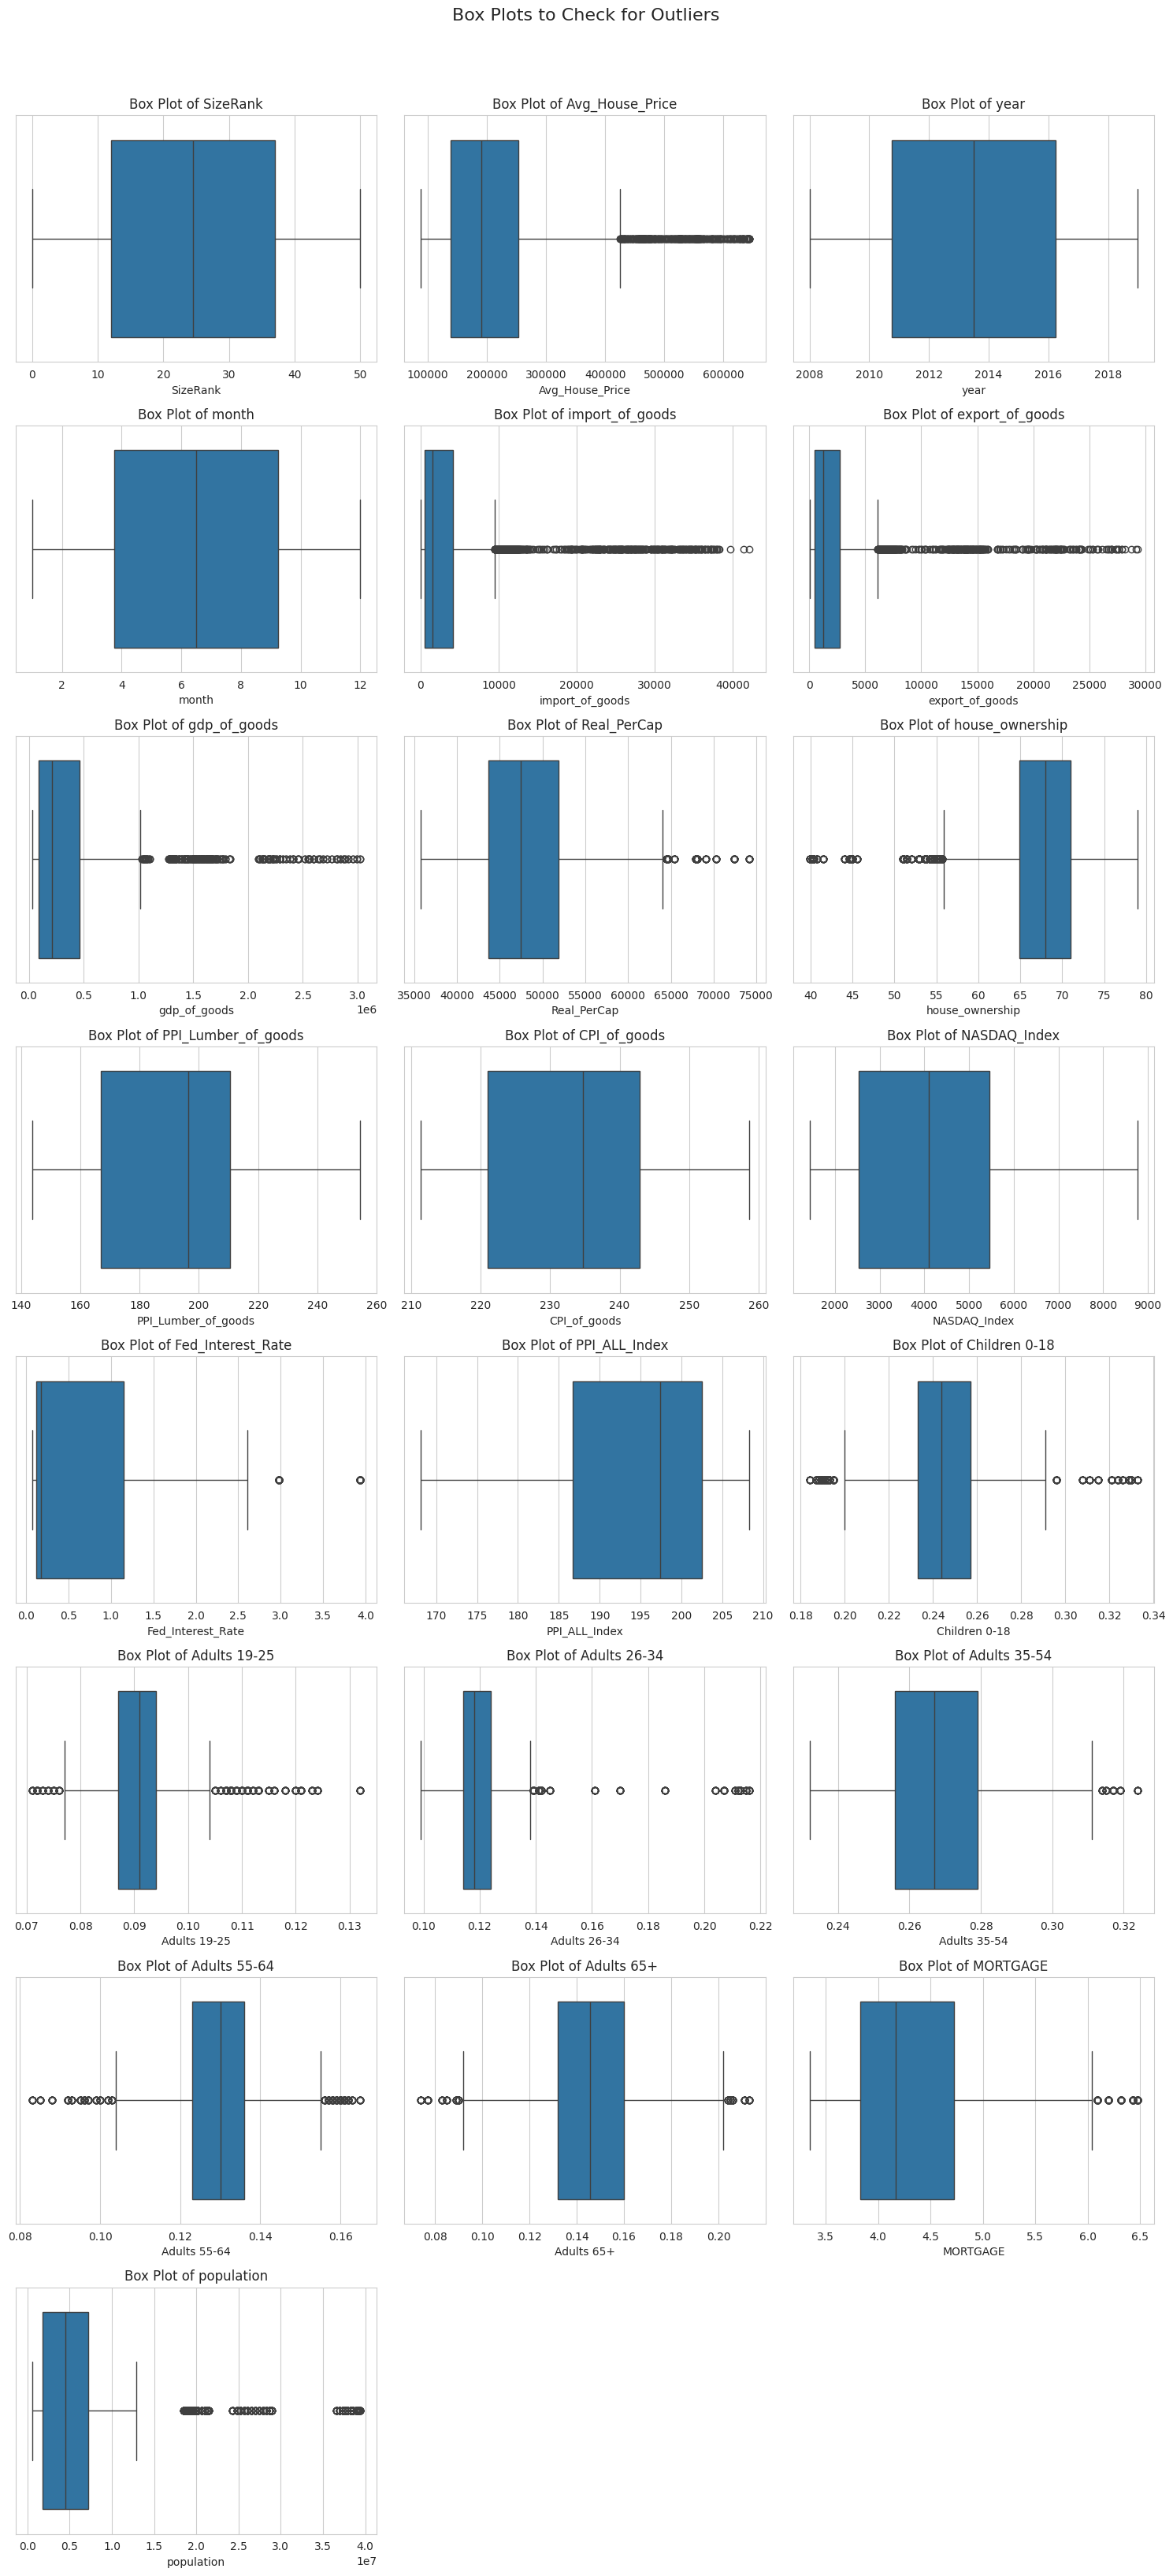

In [99]:
#Boxplot to check outliers pre clearing the dataset

from math import ceil

# Select the numerical columns to check
numerical_cols = final_merged_df.select_dtypes(include=[np.number]).columns

# Determine the number of rows and columns for the subplot grid
n_cols = 3  # We'll use 3 columns for a compact layout
n_rows = ceil(len(numerical_cols) / n_cols)

# Create the subplots
fig, axes = plt.subplots(
    nrows=int(n_rows), ncols=n_cols,
    figsize=(5 * n_cols, 4 * n_rows)
)
fig.suptitle('Box Plots to Check for Outliers', y=1.02, fontsize=16)

# Flatten the axes array for easy iteration
axes_flat = axes.flatten()

# Draw a box plot for each numerical column
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=final_merged_df[col], ax=axes_flat[i])
    axes_flat[i].set_title(f'Box Plot of {col}')
    axes_flat[i].set_xlabel(col)

# Hide any unused subplots
for i in range(len(numerical_cols), len(axes_flat)):
    axes_flat[i].set_visible(False)

plt.tight_layout()
plt.show()

In [100]:
#Clean dataset from outliers

# Select only the numerical columns
numerical_cols = final_merged_df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the IQR for each numerical column
Q1 = final_merged_df[numerical_cols].quantile(0.20)
Q3 = final_merged_df[numerical_cols].quantile(0.80)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean mask to identify rows without outliers
# A row is considered an outlier if any of its numerical columns have an outlier value
outlier_mask = ~((final_merged_df[numerical_cols] < lower_bound) | (final_merged_df[numerical_cols] > upper_bound)).any(axis=1)

# Filter the DataFrame to remove rows containing outliers
final_merged_df_no_outliers = final_merged_df[outlier_mask].copy()

print("Shape of the DataFrame before outlier removal:", final_merged_df.shape)
print("Shape of the DataFrame after outlier removal:", final_merged_df_no_outliers.shape)

Shape of the DataFrame before outlier removal: (7200, 23)
Shape of the DataFrame after outlier removal: (6066, 23)


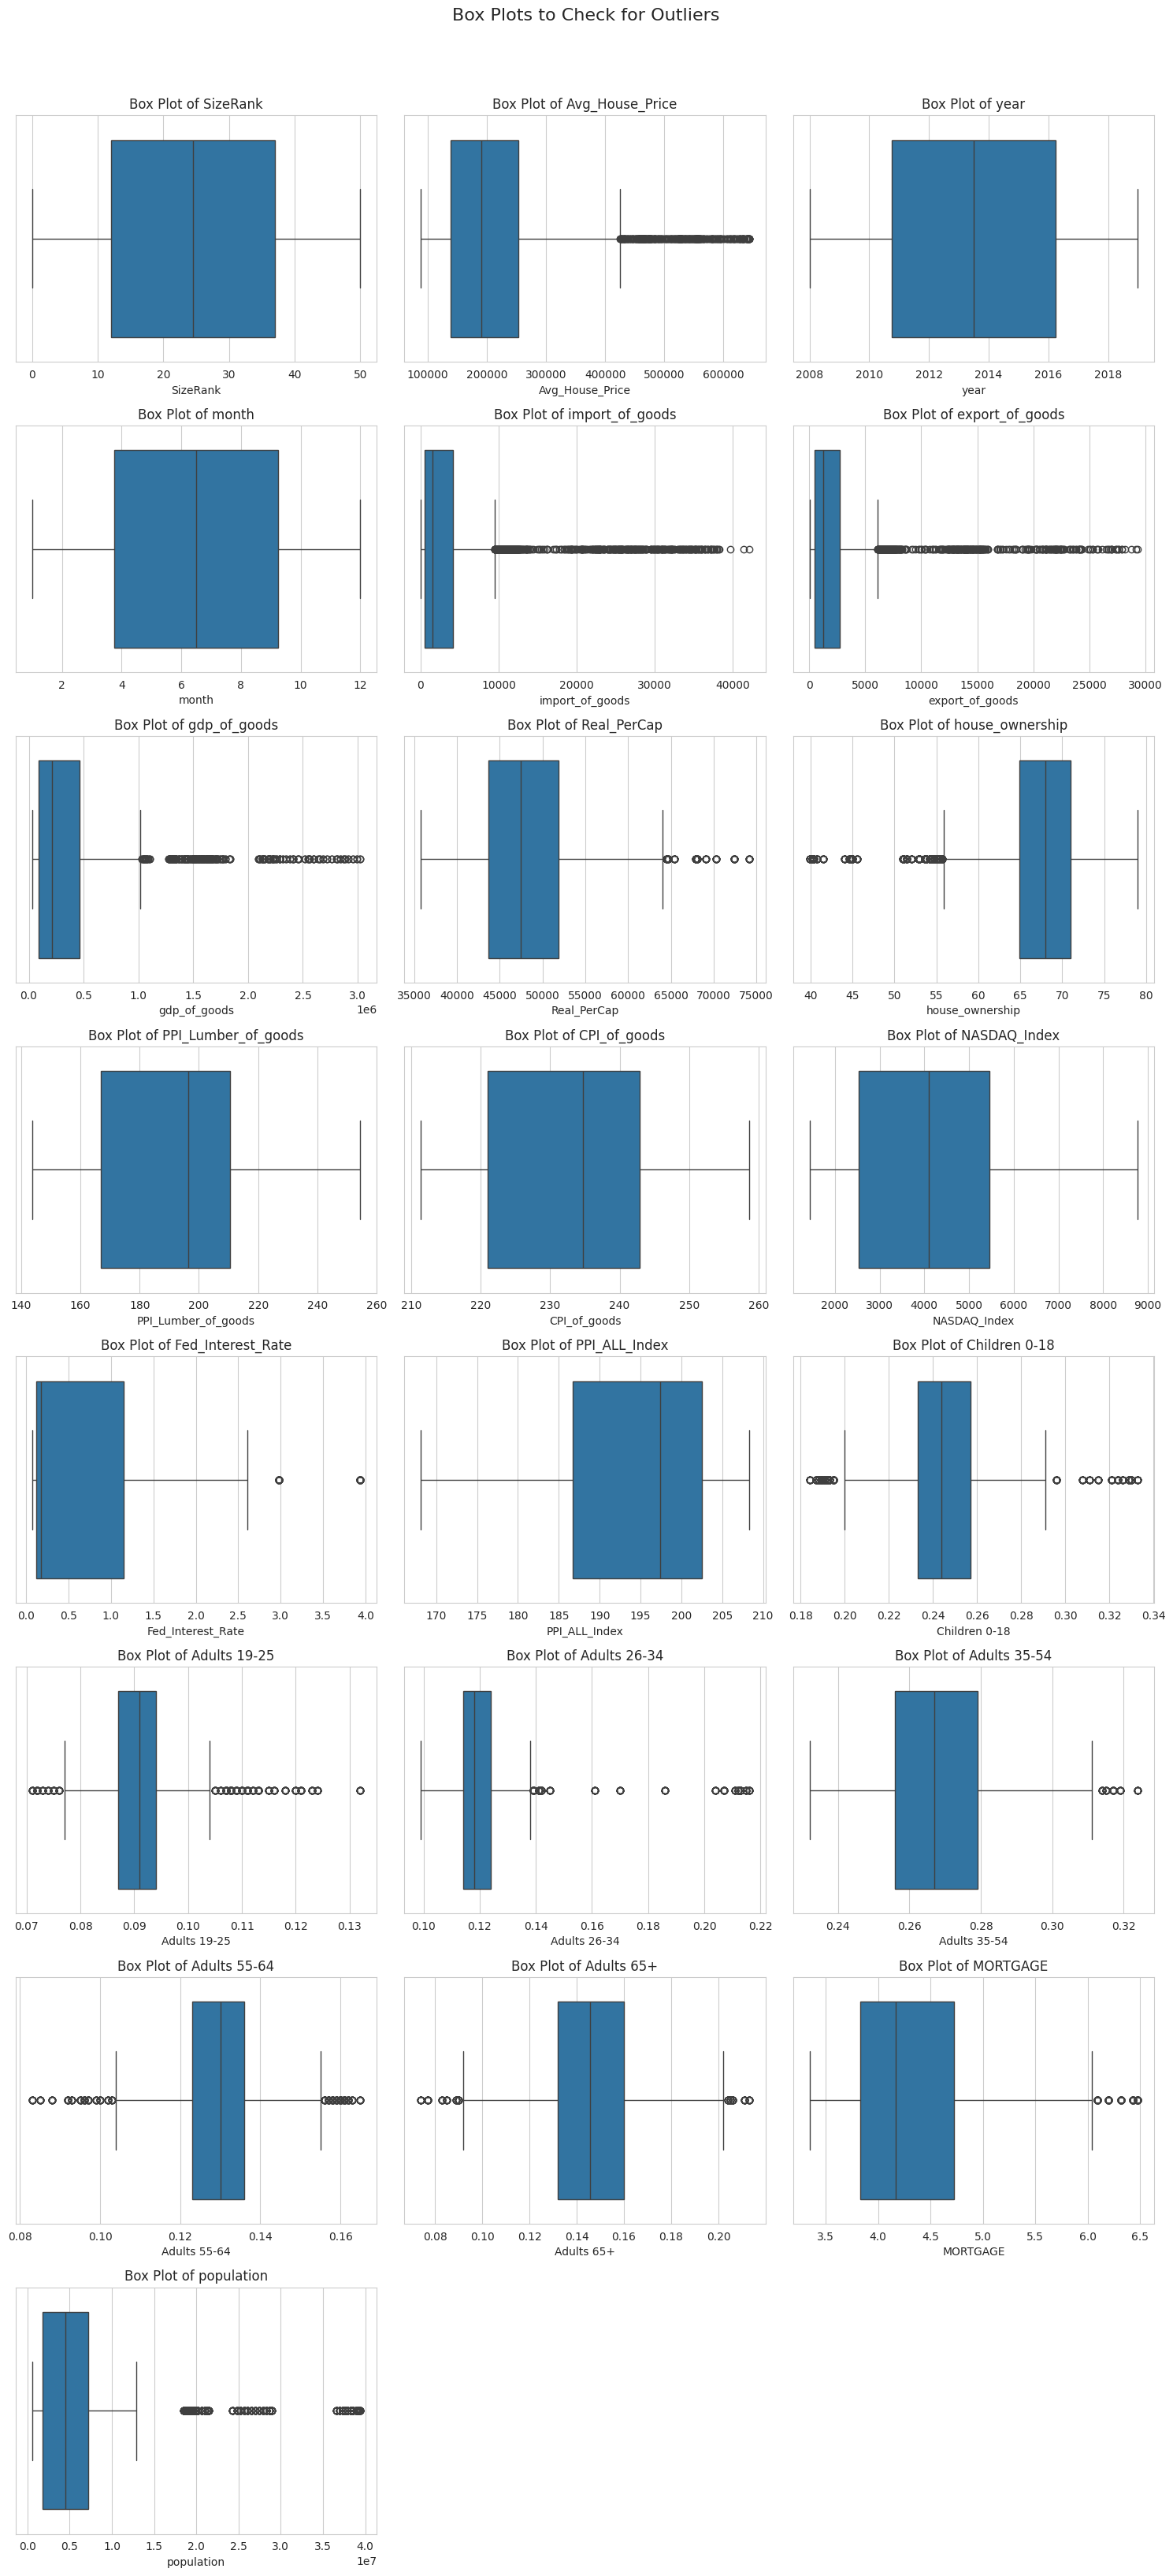

In [101]:
#Boxplot to check outliers post clearing the dataset


from math import ceil

# Select the numerical columns to check
numerical_cols = final_merged_df.select_dtypes(include=[np.number]).columns

# Determine the number of rows and columns for the subplot grid
n_cols = 3  # We'll use 3 columns for a compact layout
n_rows = ceil(len(numerical_cols) / n_cols)

# Create the subplots
fig, axes = plt.subplots(
    nrows=int(n_rows), ncols=n_cols,
    figsize=(5 * n_cols, 4 * n_rows)
)
fig.suptitle('Box Plots to Check for Outliers', y=1.02, fontsize=16)

# Flatten the axes array for easy iteration
axes_flat = axes.flatten()

# Draw a box plot for each numerical column
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=final_merged_df[col], ax=axes_flat[i])
    axes_flat[i].set_title(f'Box Plot of {col}')
    axes_flat[i].set_xlabel(col)

# Hide any unused subplots
for i in range(len(numerical_cols), len(axes_flat)):
    axes_flat[i].set_visible(False)

plt.tight_layout()
plt.show()

# **Exploratory Data Analysis (EDA)**

# Correlation Matrix


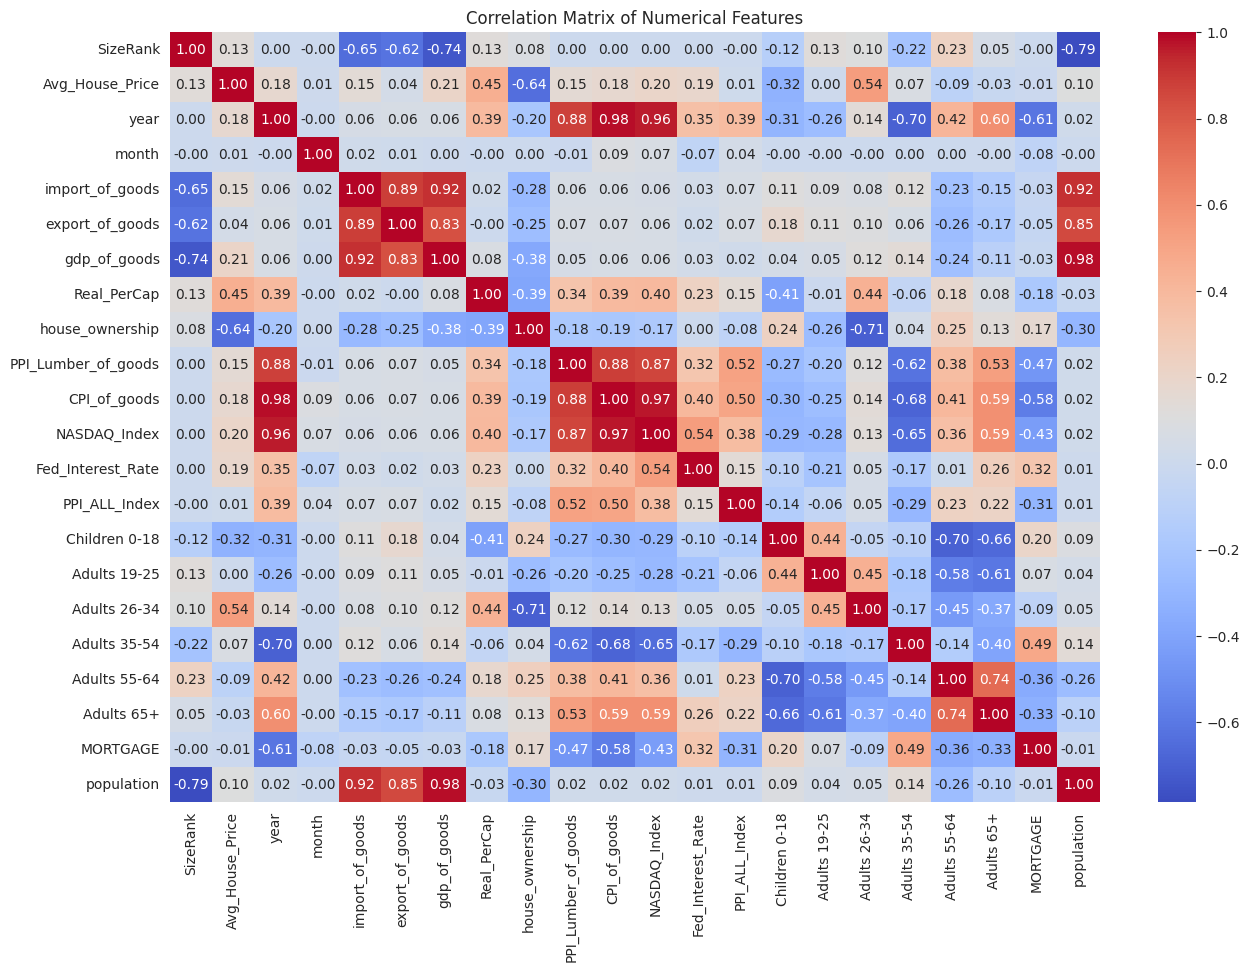

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numerical columns for correlation analysis
numerical_cols = final_merged_df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = final_merged_df[numerical_cols].corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Findings from the Correlation Matrix

The correlation matrix visualizes the pairwise correlations between all numerical features in the dataset. Key observations from the heatmap include:

*   **Average House Price ('Avg_House_Price')** shows varying degrees of correlation with other variables. We can see which features have the strongest positive or negative linear relationships with the target variable.
*   **Inter-feature correlations:** The heatmap also reveals relationships between the predictor variables themselves. High correlations between predictors might indicate multicollinearity, which can be important to consider for certain modeling techniques.

Specific correlations of interest with 'Avg_House_Price' (as observed in the heatmap and the subsequent bar plot):

*   'house_ownership' has a strong negative correlation.
*   'Real_PerCap', 'Adults 26-34', and 'gdp_of_goods' show positive correlations.
*   Other variables like 'import_of_goods', 'export_of_goods', various age groups, and economic indices exhibit weaker correlations, both positive and negative.

These correlations provide initial insights into which variables might be most influential in predicting average house prices.

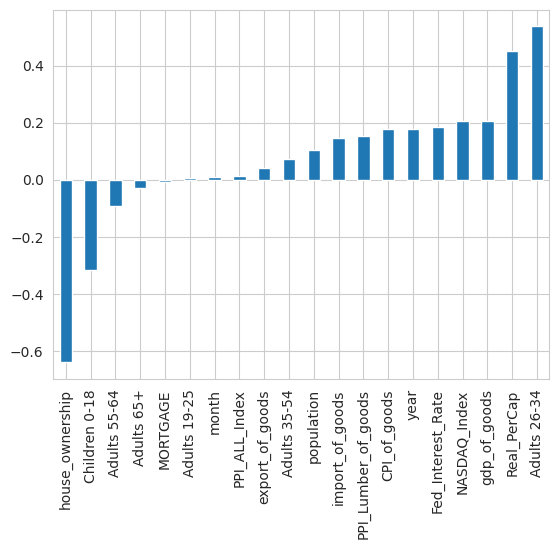

In [103]:
correlation_matrix["Avg_House_Price"][2:].sort_values().plot(kind = "bar");

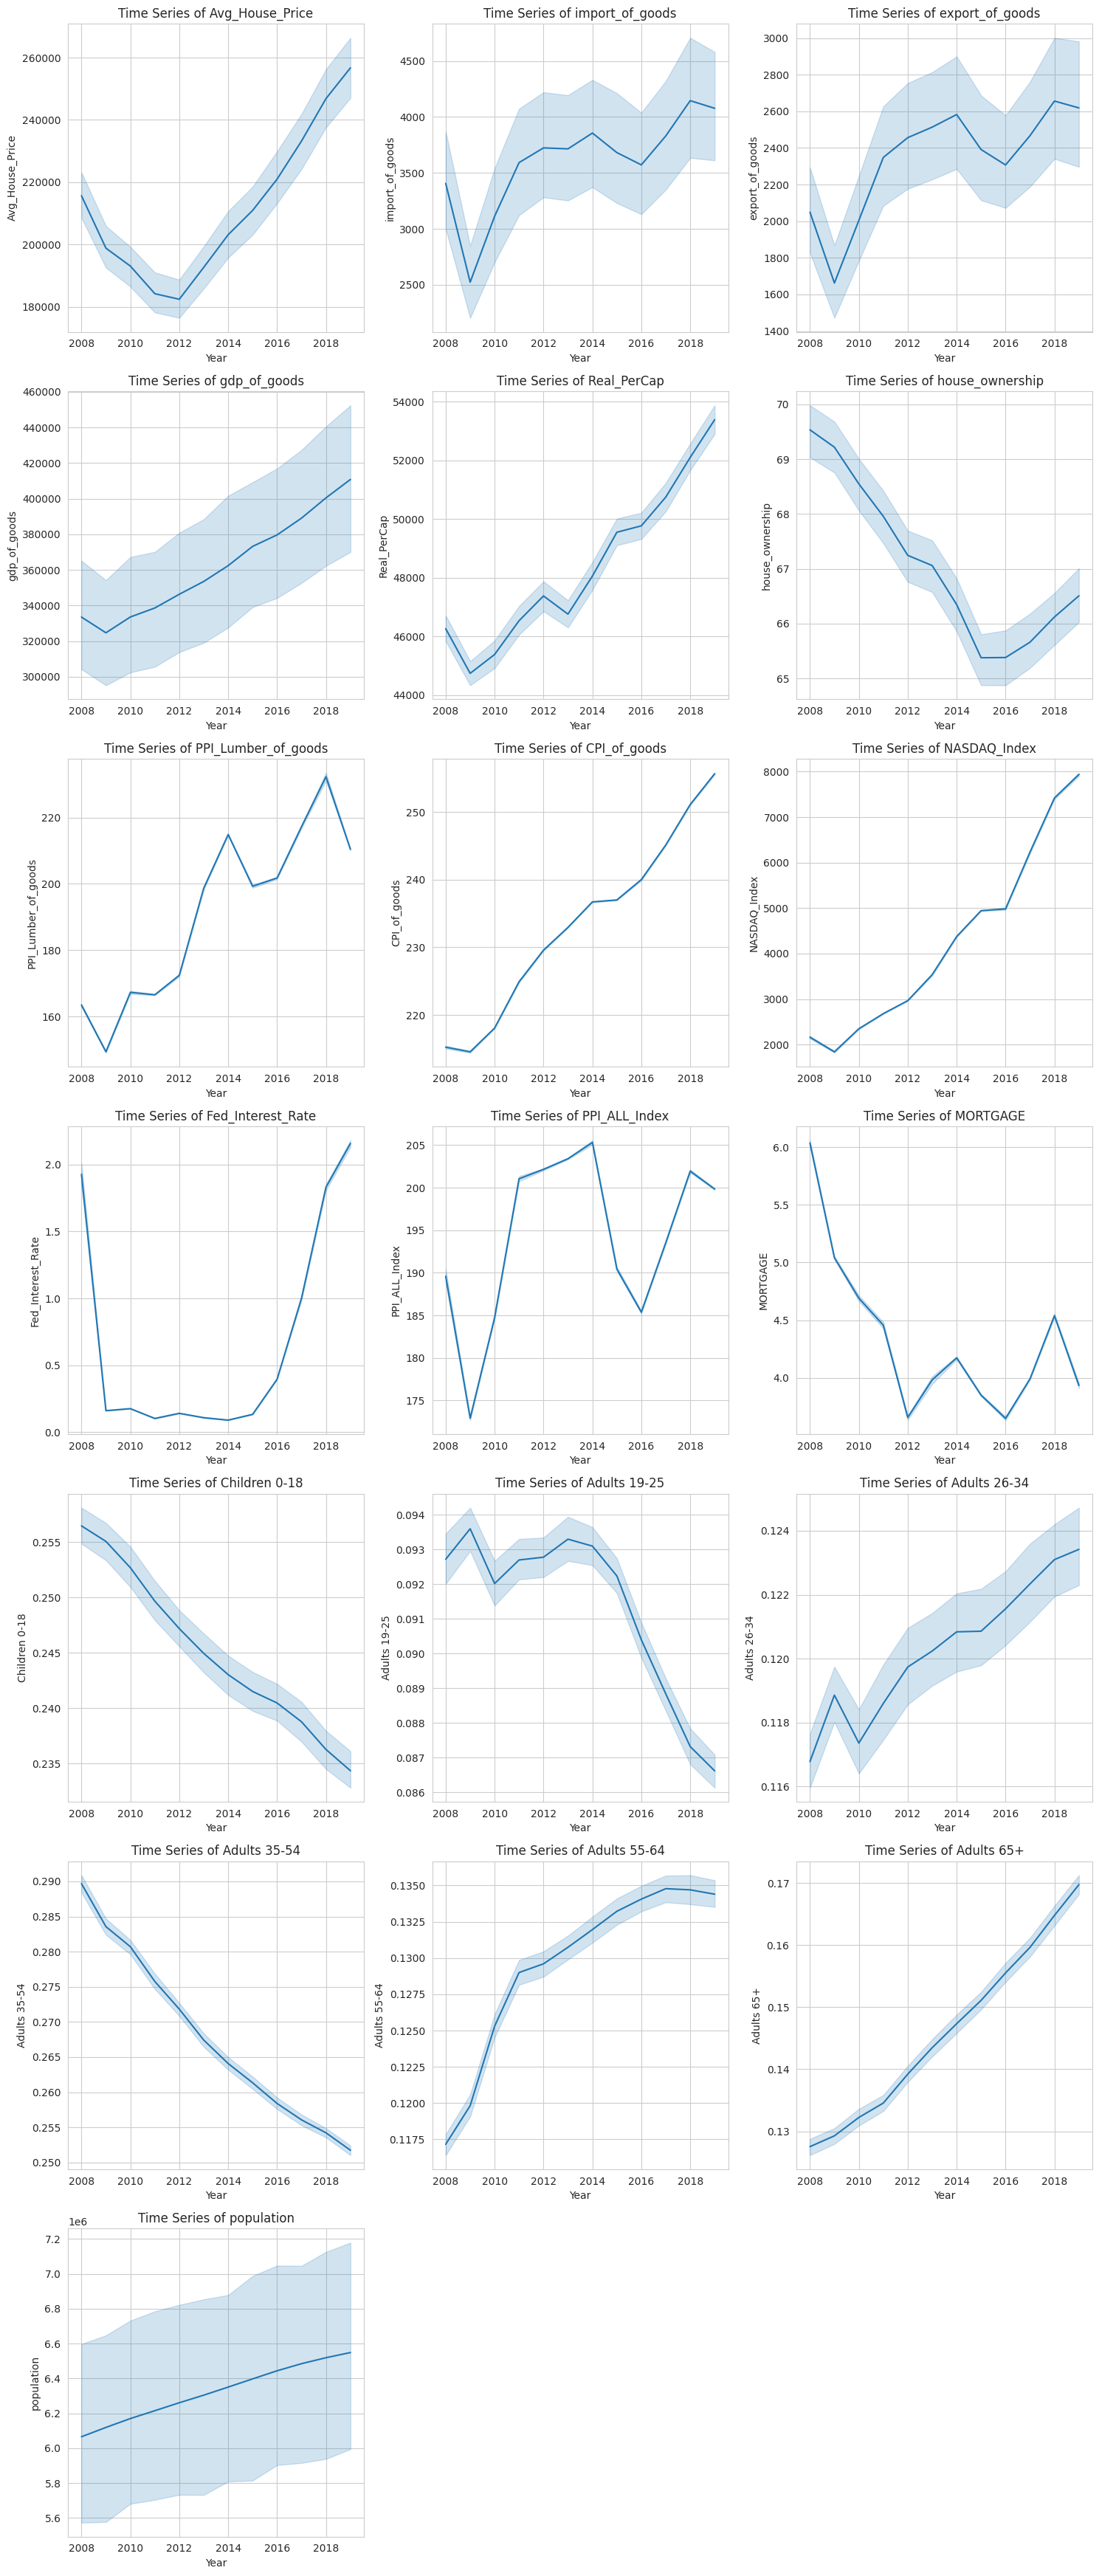

In [104]:
#Create time series plots for the specified numerical features for individual states and for the overall dataset.

import matplotlib.pyplot as plt
import seaborn as sns

# Select the numerical columns for plotting
numerical_cols = ['Avg_House_Price', 'import_of_goods', 'export_of_goods',
                  'gdp_of_goods', 'Real_PerCap', 'house_ownership',
                  'PPI_Lumber_of_goods', 'CPI_of_goods', 'NASDAQ_Index',
                  'Fed_Interest_Rate', 'PPI_ALL_Index', 'MORTGAGE',
                  'Children 0-18', 'Adults 19-25', 'Adults 26-34',
                  'Adults 35-54', 'Adults 55-64', 'Adults 65+', 'population']

# Determine the number of rows and columns for subplots
n_cols = 3  # You can adjust the number of columns as needed
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

# Create a figure and a set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Create time series plots for each numerical column in subplots
for i, col in enumerate(numerical_cols):
    sns.lineplot(data=final_merged_df, x='year', y=col, ax=axes[i])
    axes[i].set_title(f'Time Series of {col}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(col)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Findings from the Time Series Plots

The time series plots provide a visual overview of how various economic, demographic, and housing-related variables have changed over time (from 2008 to 2019) in the dataset. Key trends observed include:

*   **Average House Price ('Avg_House_Price'):** The plot shows a notable dip in average house prices around 2010-2012, likely reflecting the impact of the 2008 financial crisis, followed by a general upward trend in subsequent years.
*   **Import and Export of Goods:** Both import and export values show fluctuations over the period, with a general recovery after the initial dip around 2008-2009.
*   **GDP of Goods:** State-level GDP of goods exhibits a consistent upward trend throughout the analyzed period, indicating overall economic growth.
*   **Real Per Capita Income:** Similar to GDP, real per capita income also shows a general increasing trend, suggesting improving economic well-being over time.
*   **House Ownership:** The house ownership rate appears to have a slight downward trend or stagnation in the earlier years, potentially related to the housing market downturn, followed by a relatively stable period.
*   **Price Indices (PPI Lumber, CPI All, PPI All Index):** These indices show varying patterns, reflecting changes in the cost of goods and overall inflation.
*   **NASDAQ Index:** The NASDAQ index shows significant growth over the period, particularly in the later years, indicating a strong performance in the technology sector.
*   **Fed Interest Rate and MORTGAGE:** The Federal Interest Rate and Mortgage rates show a declining trend in the years following the financial crisis, reaching low points before starting to rise again towards the end of the period.
*   **Age Demographics:** The proportion of different age groups in the population shows gradual shifts over time, which can be indicative of demographic trends. For example, the 'Adults 65+' group appears to be increasing, while some younger age groups might be decreasing or stable.
*   **Population:** Total state population shows a steady upward trend, reflecting overall population growth.

These time series trends provide valuable context for understanding the dynamics of the housing market and the potential influence of these factors on average house prices.

## Compare Avg_House_Price with other variables at state level


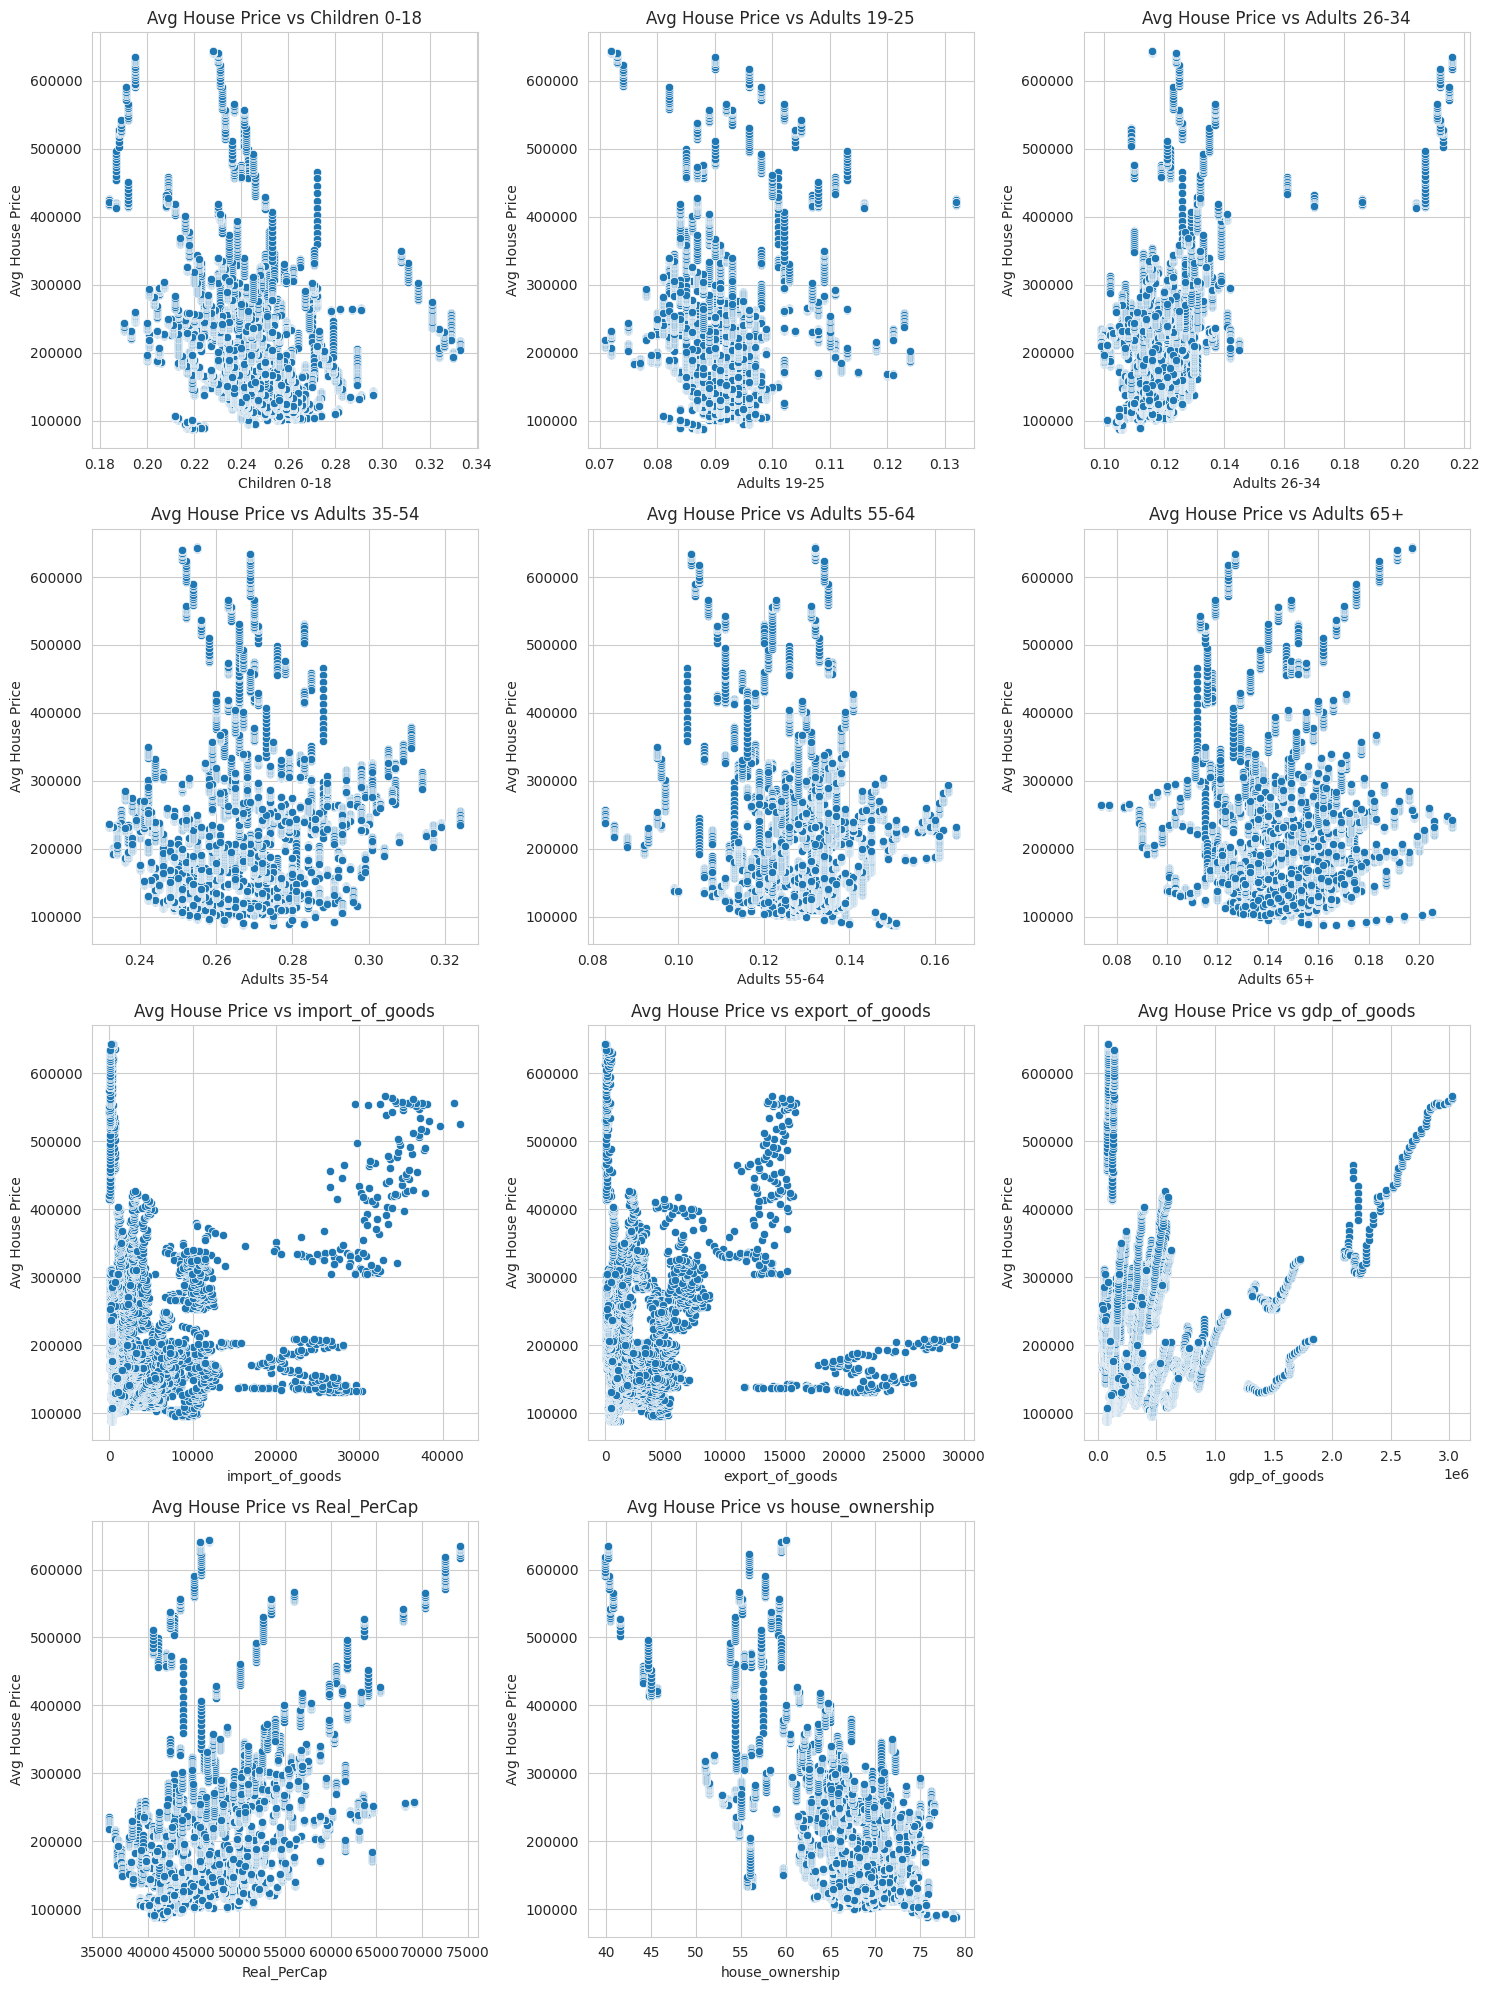

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

#Create scatter plots to visualize the relationship between 'Avg_House_Price' and age demographics, imports, exports, GDP, per capita income, and house ownership at the state level.

# List of variables to compare with Avg_House_Price
comparison_vars = ['Children 0-18', 'Adults 19-25', 'Adults 26-34', 'Adults 35-54',
                   'Adults 55-64', 'Adults 65+', 'import_of_goods', 'export_of_goods',
                   'gdp_of_goods', 'Real_PerCap', 'house_ownership']

# Determine the number of rows and columns for subplots
n_cols = 3
n_rows = (len(comparison_vars) + n_cols - 1) // n_cols

# Create a figure and a set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

# Create scatter plots for each comparison variable against Avg_House_Price
for i, var in enumerate(comparison_vars):
    sns.scatterplot(data=final_merged_df, x=var, y='Avg_House_Price', ax=axes[i])
    axes[i].set_title(f'Avg House Price vs {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Avg House Price')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## **Summary of Exploratory Data Analysis Findings**

Based on the correlation matrix and scatter plots generated during the exploratory data analysis, here are the key findings regarding the relationships between Average House Price and other variables in the dataset:

**Variables with Strong Correlations with Average House Price:**

*   **House Ownership (-0.64):** There is a strong negative correlation between house ownership rate and average house price. This suggests that states with lower home ownership rates tend to have higher average house prices. This could be due to factors like affordability constraints in expensive markets, where a smaller percentage of the population can afford to own a home.
*   **Real Per Capita Income (0.45):** Real per capita income shows a moderate positive correlation with average house price. This aligns with expectations, as higher income levels generally correspond to greater purchasing power and thus higher housing demand and prices.
*   **Adults 26-34 (0.54):** The proportion of the population in the 26-34 age group exhibits a moderate positive correlation with average house price. This age group often represents a significant portion of first-time homebuyers, and a larger presence of this demographic could drive up housing demand and prices.
*   **GDP of Goods (0.21):** State-level GDP of goods has a positive correlation with average house price, indicating that states with stronger economies (as measured by GDP) tend to have higher average housing values.

**Variables with Moderate to Weak Correlations with Average House Price:**

*   **Imports (0.15) and Exports (0.04):** The volume of imports and exports show relatively weak positive correlations with average house price. While international trade can influence economic activity, its direct impact on average house prices at the state level in this dataset appears to be limited.
*   **PPI Lumber (0.15), CPI All (0.18), NASDAQ Index (0.20), Fed Interest Rate (0.19), PPI All Index (0.01):** These economic indicators show varying degrees of correlation with average house price. The CPI All and NASDAQ Index have slightly stronger positive correlations compared to PPI Lumber and PPI All Index. The Federal Interest Rate shows a weak positive correlation. These relationships suggest that broader economic conditions and market sentiment have some influence on housing prices.

**Variables with Very Weak or Negligible Correlations with Average House Price:**

*   **Population (0.10):** Total state population shows a very weak positive correlation with average house price. This suggests that while population size might play a role, it's not a dominant factor in determining average house prices compared to other economic or demographic variables in this dataset.
*   **MORTGAGE (-0.01):** The average mortgage rate shows a negligible correlation with average house price in this dataset. This is unexpected, as mortgage rates typically have a significant impact on housing affordability and demand. Further investigation might be needed to understand this weak relationship in this specific dataset.

**Other Age Demographic Groups:**

*   **Children 0-18 (-0.32):** Shows a moderate negative correlation with average house price.
*   **Adults 19-25 (0.00), Adults 35-54 (0.07), Adults 55-64 (-0.09), Adults 65+ (-0.03):** These age groups show weak or negligible correlations with average house price.

**Overall Assessment for Predicting Average House Price:**

Based on the presence of several variables with moderate to strong correlations (especially house ownership, Real Per Capita Income, Adults 26-34, and GDP of Goods), this dataset appears to be a reasonably good starting point for predicting average house price. The variables with weaker correlations might still contribute to a predictive model, and their combined effect could be significant.

However, it's important to note that correlation does not imply causation. Further analysis and modeling techniques would be required to build a robust predictive model and understand the causal relationships between these variables and average house prices.

## Choropleth Maps

Visualize the spatial distribution of key variables across states using choropleth maps. Generate choropleth maps to visualize the spatial distribution of key variables. This involves selecting relevant columns, preparing the data in the required format for mapping libraries (like Plotly Express), and generating the map for each selected variable.

In [106]:
import plotly.express as px
#The choropleth maps provide a spatial and temporal visualization of key variables across the United States from 2008 to 2019. Observing the animation of these maps allows for insights into regional differences and how these variables have evolved over time.

# Select the columns for choropleth maps
map_vars = ['Avg_House_Price', 'Real_PerCap', 'house_ownership', 'gdp_of_goods', 'population']

# Create choropleth maps for each selected variable
for var in map_vars:
    fig = px.choropleth(final_merged_df,
                        locations="StateName",
                        locationmode="USA-states",
                        color=var,
                        scope="usa",
                        animation_frame="year",
                        color_continuous_scale="Viridis",
                        title=f'Spatial Distribution of {var} by State Over Time')
    fig.show()








#**Modeling**








# Standard Scaler

In [107]:
## intiate the Standard Scaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the CSV file into a dataframe
try:
    df = pd.read_csv('/content/Output/final_dataset.csv')
except FileNotFoundError:
    print("The file was not found. Please check the file path.")

# Drop the 'statename' column as it's a string column
df = df.drop(columns=['StateName'])

# Split the dataset into train and test
# Assuming a 80/20 split and using a random_state for reproducibility
X = df.drop(columns=['Avg_House_Price'])
y = df['Avg_House_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



KDE Plots for Non-Scaled Data:


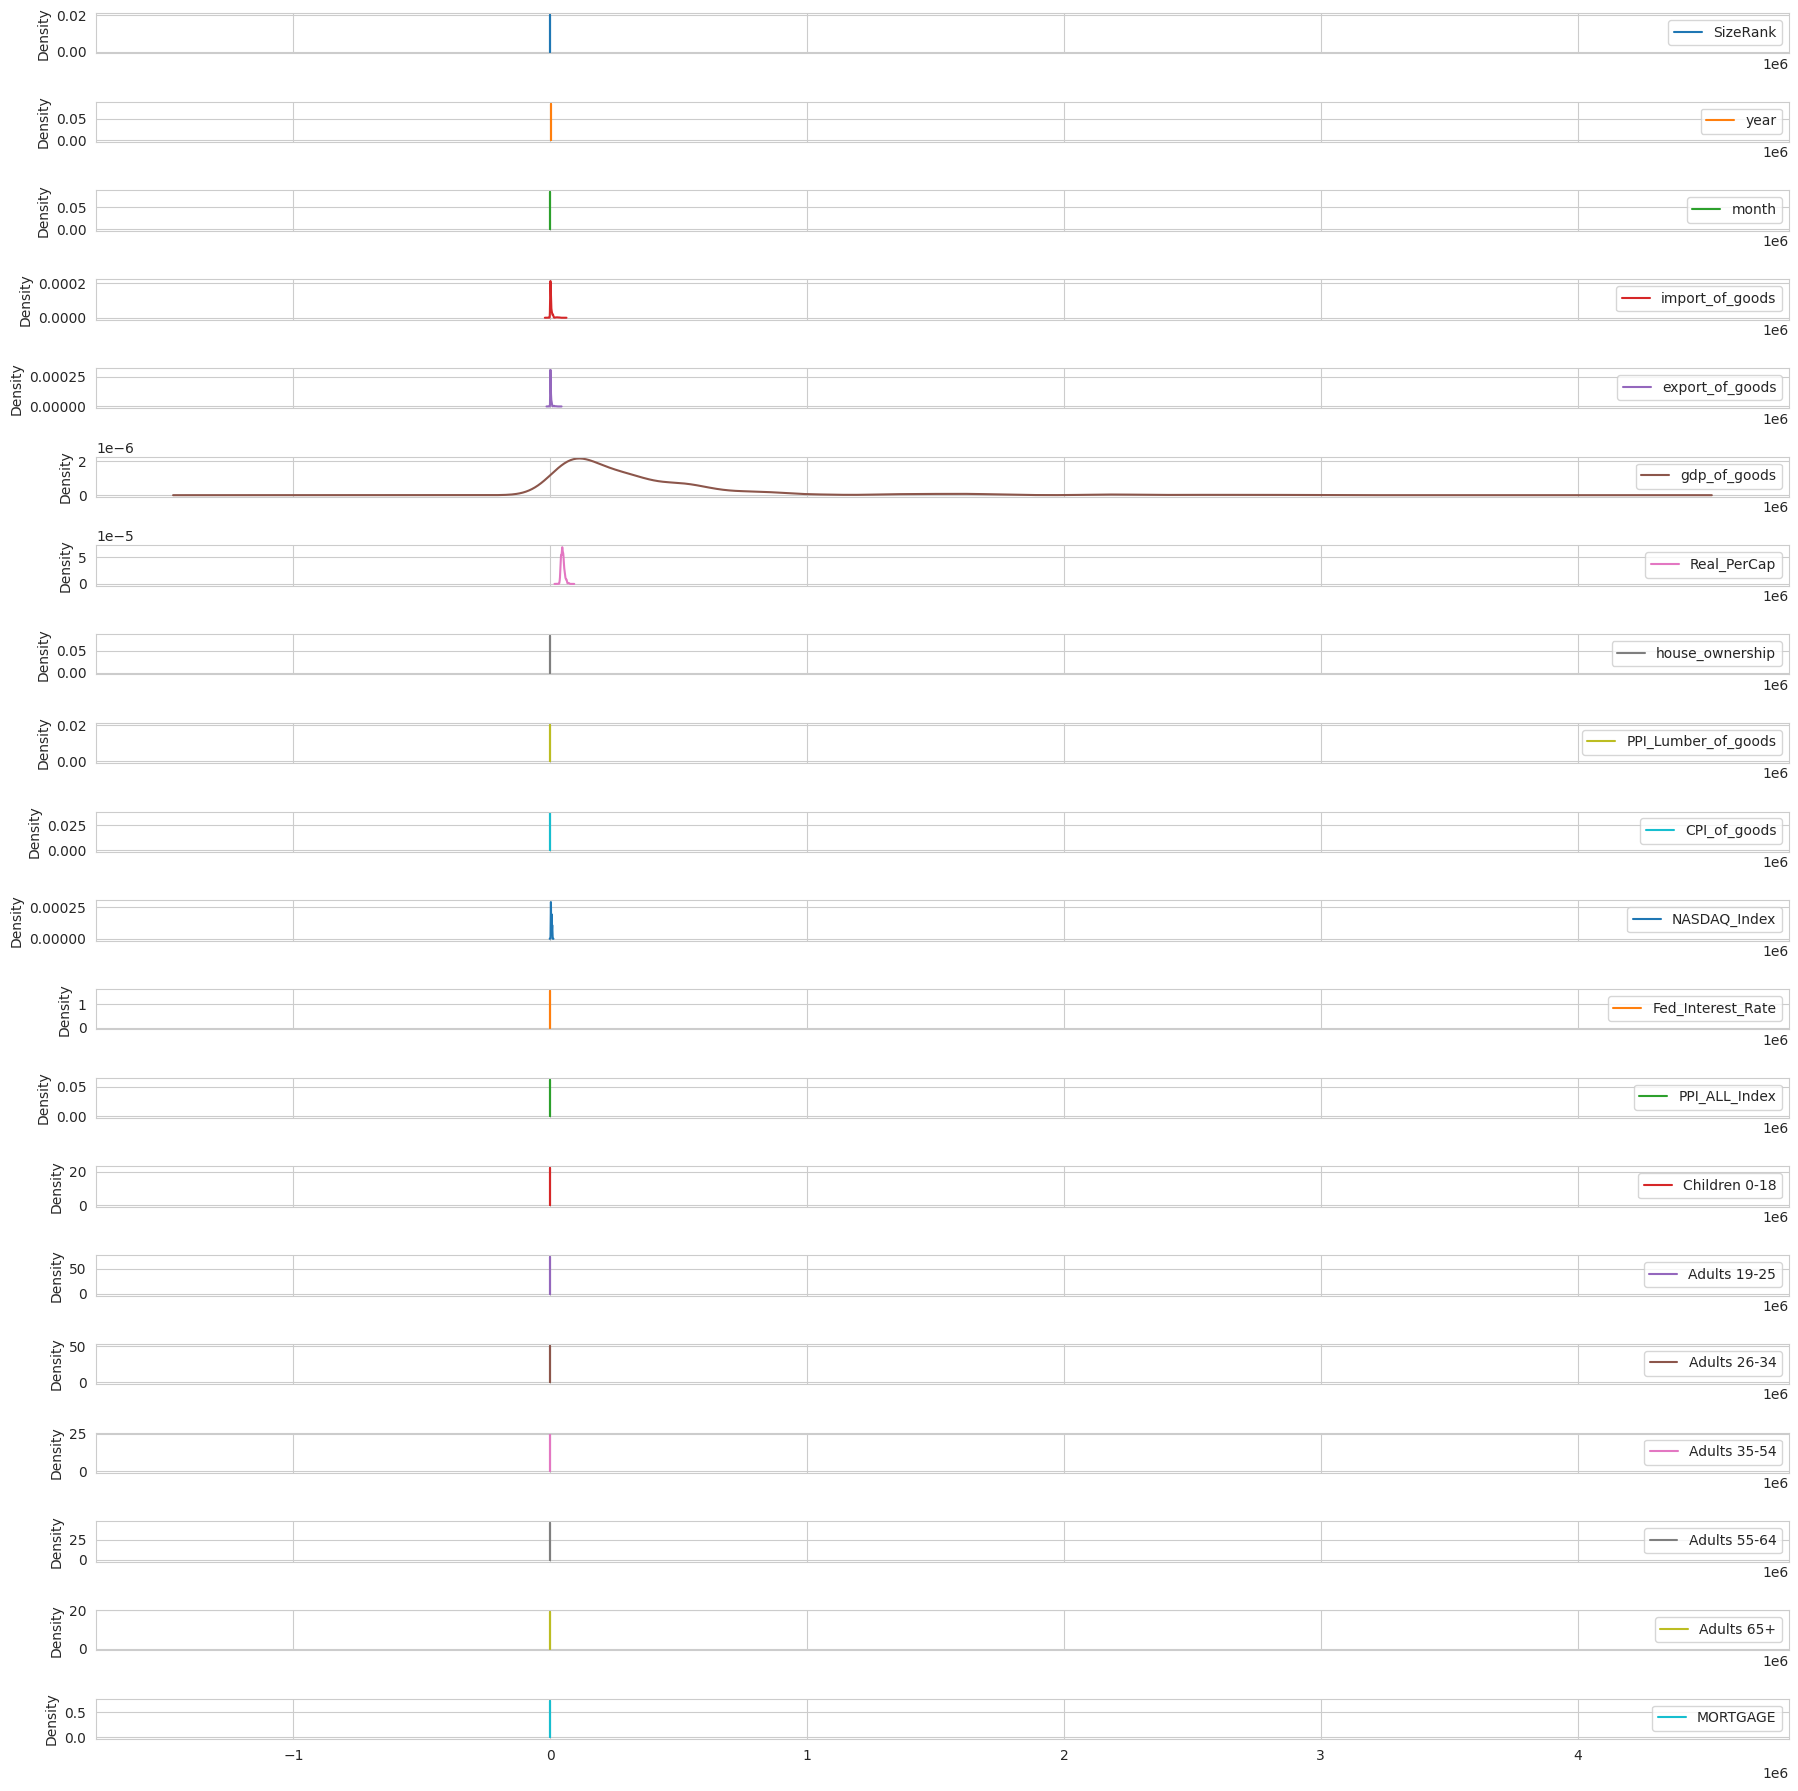

In [108]:
# Plot the KDE for non-scaled data
print("KDE Plots for Non-Scaled Data:")
X_train.plot(kind='kde', subplots=True, figsize=(18, 18))
plt.tight_layout()
plt.show()



In [109]:
# Do Standard Scaler on both train and test datasets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled array back to a DataFrame for plotting
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

KDE Plots for Scaled Data:


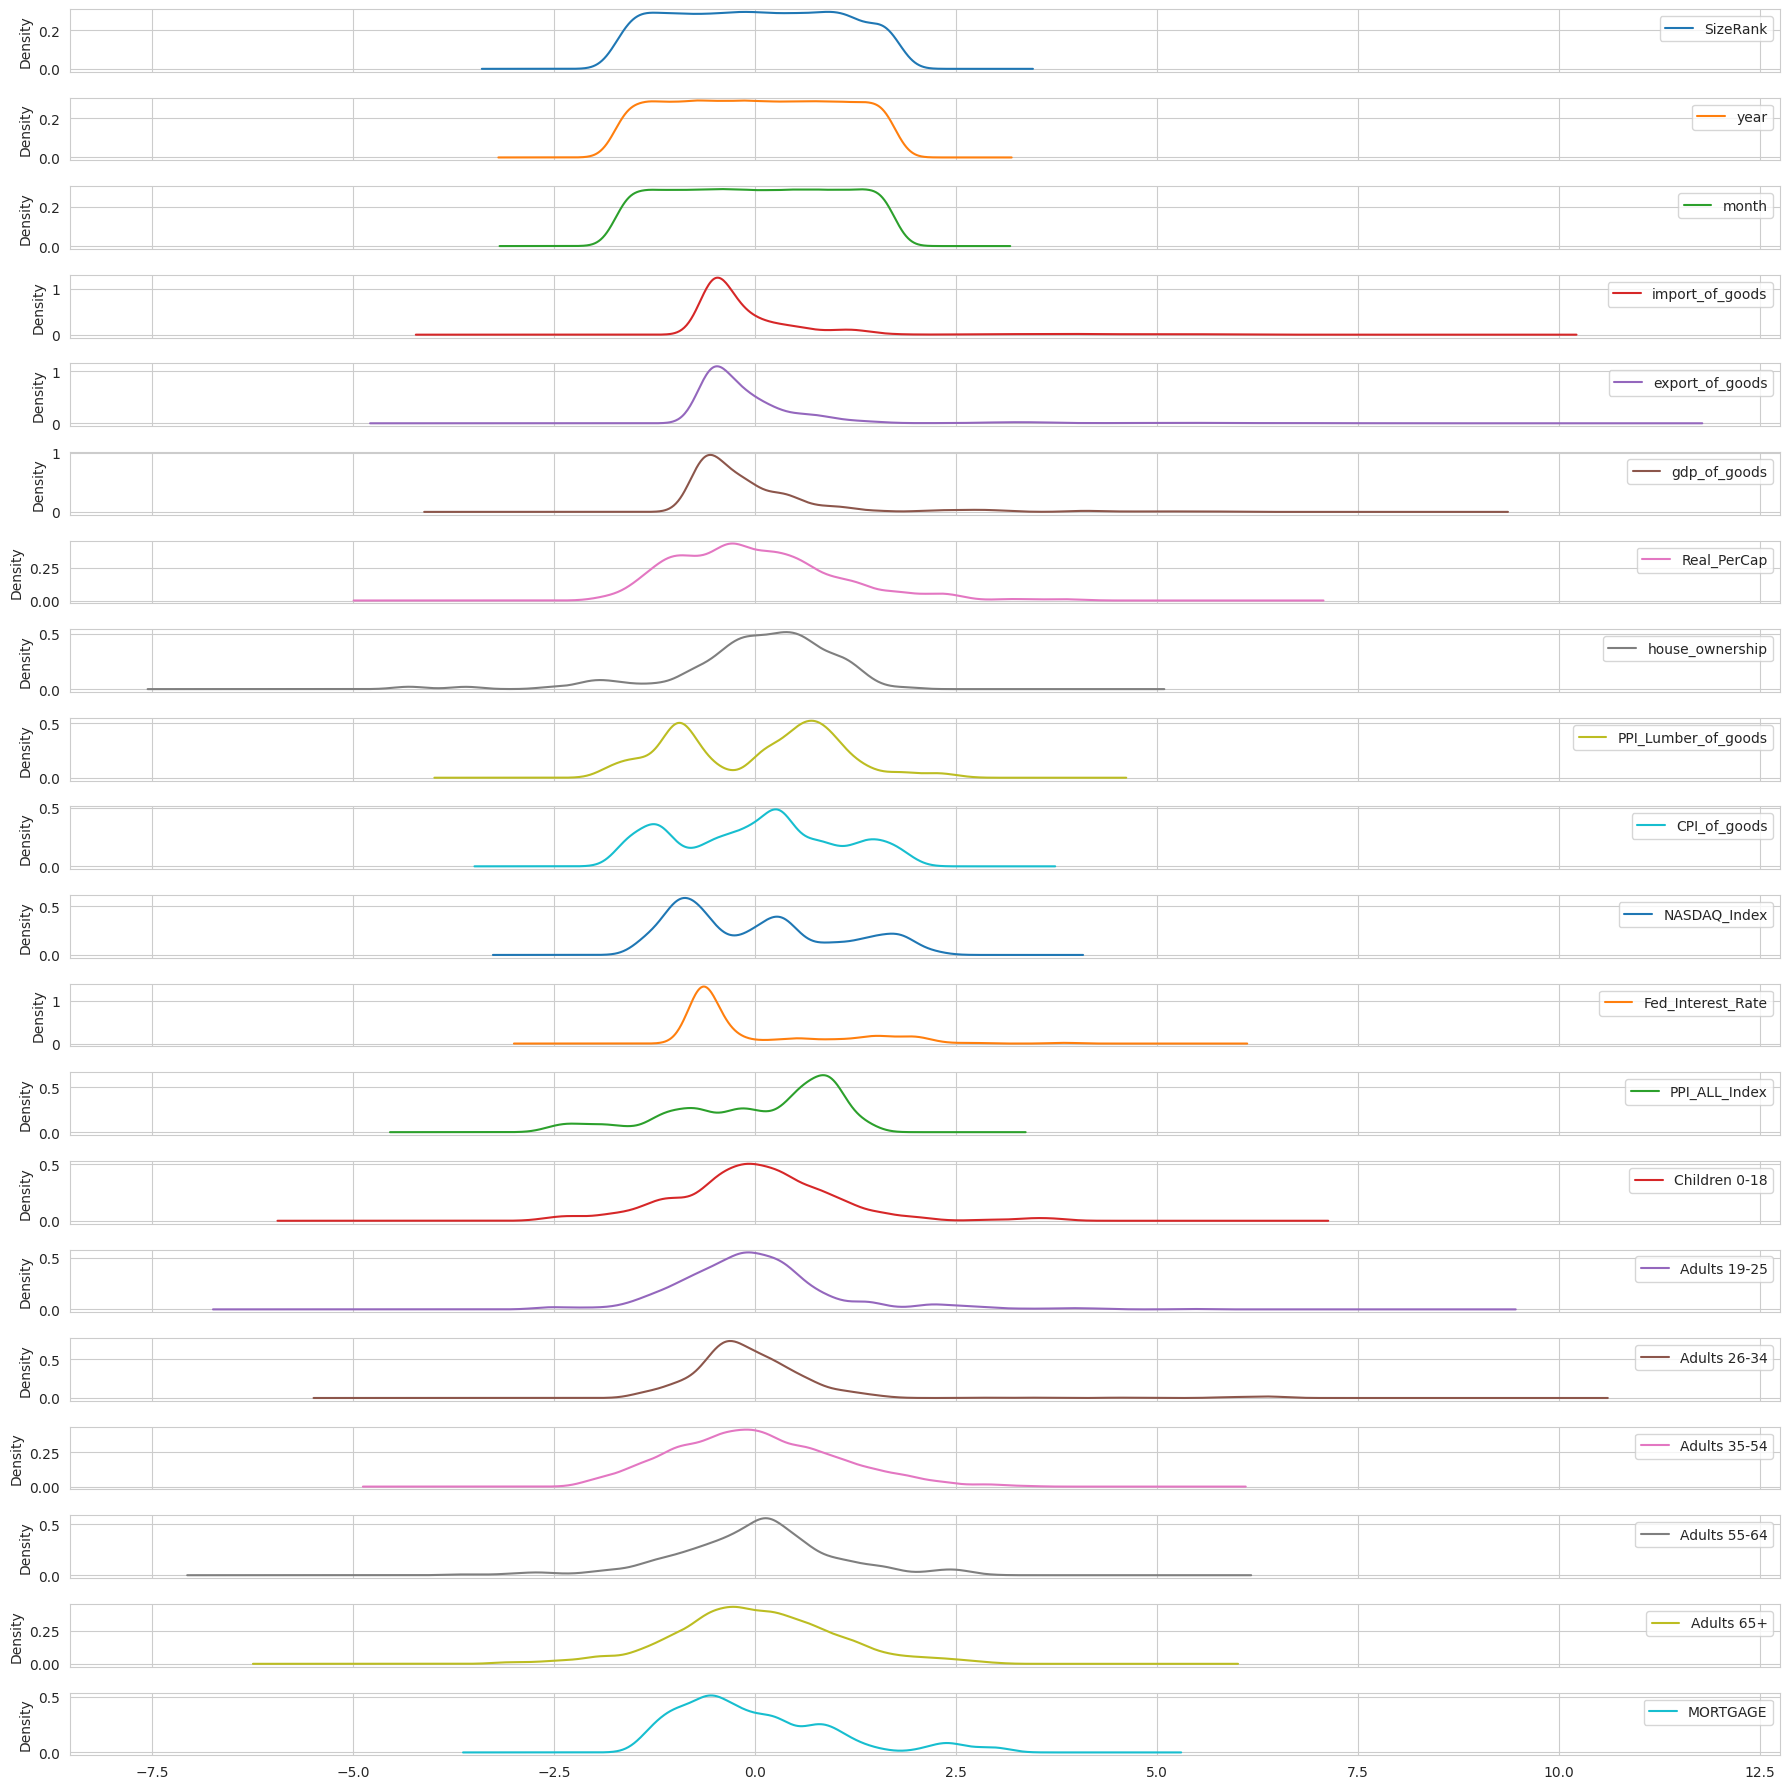

In [110]:

# Plot the KDE for the scaled data
print("KDE Plots for Scaled Data:")
X_train_scaled_df.plot(kind='kde', subplots=True, figsize=(18, 18))
plt.tight_layout()
plt.show()

## Linear Regression Model declaration ##


In [111]:
# Load the CSV file into a dataframe
try:
    df = pd.read_csv('/content/Output/final_dataset.csv')
except FileNotFoundError:
    print("The file was not found. Please check the file path.")
    # Exit if file not found to prevent errors in subsequent steps
    exit()

# Drop the 'statename' column as it's a string column
df = df.drop(columns=['StateName'])

# Split the dataset into train and test
X = df.drop(columns=['Avg_House_Price'])
y = df['Avg_House_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Do Standard Scaler on both train and test datasets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 1) Build model pipelines + hyperparameter grids

# Linear Regression pipeline (as a baseline)
linear: {'poly_features__degree': 3}
ridge: {'poly_features__degree': 3, 'ridge__alpha': np.float64(0.001)}
lasso_feature_selection: {'poly_features__degree': 3, 'selector__estimator__alpha': np.float64(1.0)}
lasso: {'lasso__alpha': np.float64(4.414667091806673), 'poly_features__degree': 2}



linear_pipe = Pipeline([
    ('poly_features', PolynomialFeatures(degree=1, include_bias=False)),
    ('scaler', StandardScaler()),
    ('linear', LinearRegression())
])
linear_param_dict = {
    'poly_features__degree': [3]
}
linear_grid = GridSearchCV(
    estimator=linear_pipe,
    param_grid=linear_param_dict,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Ridge grid
ridge_param_dict = {
    'poly_features__degree': [3],
    'ridge__alpha': [np.float64(0.001)]
}
ridge_pipe = Pipeline([
    ('poly_features', PolynomialFeatures(degree=1, include_bias=False)),
    ('ridge', Ridge(random_state=42))
])
ridge_grid = GridSearchCV(
    ridge_pipe,
    ridge_param_dict,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Lasso (feature selection) grid
lasso_feature_selection_param_dict = {
    'poly_features__degree': [3],
    'selector__estimator__alpha':[np.float64(1.0)]
}
lasso_feature_selection_pipe = Pipeline([
    ('poly_features', PolynomialFeatures(degree=1, include_bias=False)),
    ('scaler', StandardScaler()),
    ('selector', SelectFromModel(estimator=Lasso(alpha=1, random_state=42))),
    ('lasso_feature_selection_model', LinearRegression())
])
lasso_feature_selection_grid = GridSearchCV(
    lasso_feature_selection_pipe,
    lasso_feature_selection_param_dict,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Plain Lasso grid
lasso_param_dict = {
    'poly_features__degree': [3], # Added degree 1 for comparison
    'lasso__alpha': [np.float64(4.414667091806673)] # Range adjusted for better performance
}
lasso_pipe = Pipeline([
    ('poly_features', PolynomialFeatures(degree=1, include_bias=False)),
    ('scaler', StandardScaler()),
    ('lasso', Lasso(random_state=42))
])
lasso_grid = GridSearchCV(
    lasso_pipe,
    lasso_param_dict,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Model registry
models = {
    'linear': linear_grid,
    'ridge': ridge_grid,
    'lasso_feature_selection': lasso_feature_selection_grid,
    'lasso': lasso_grid
}

In [112]:
linear_pipe.fit(X_train_scaled, y_train)


ridge_pipe.fit(X_train_scaled, y_train)


lasso_pipe.fit(X_train_scaled, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.410e+12, tolerance: 5.798e+09



Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('scaler', StandardScaler()),
                ('lasso', Lasso(random_state=42))])

# Coefficient Comparison
Coefficient Comparison for a degree 1 model

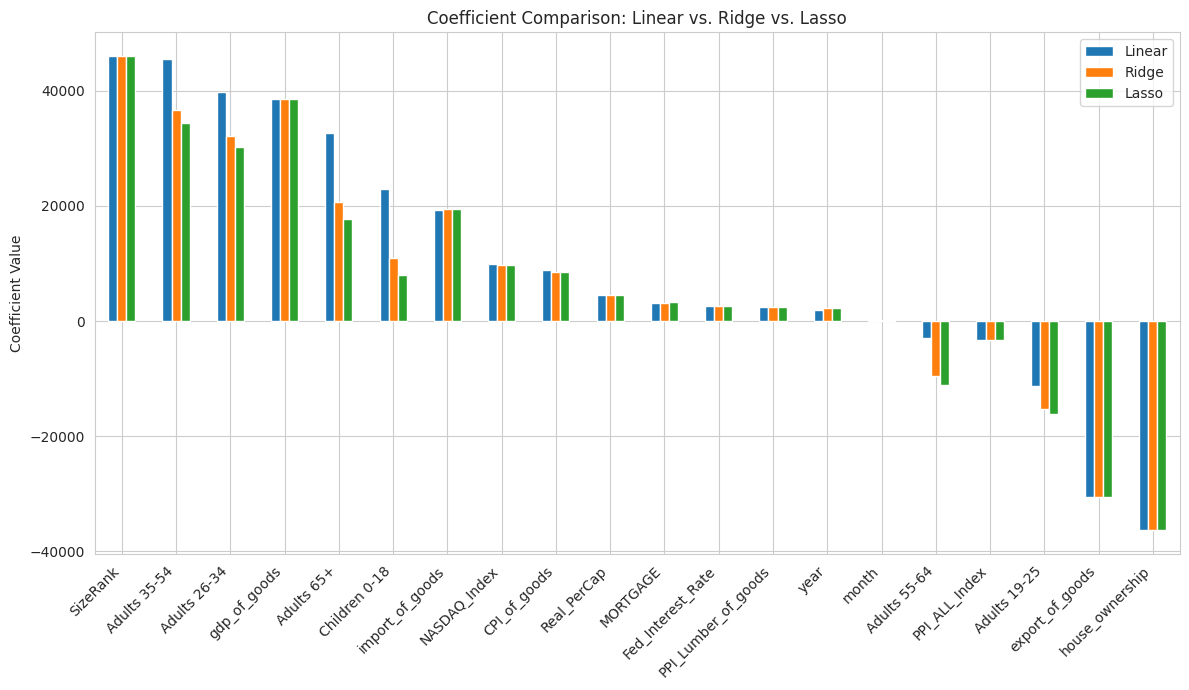

In [113]:
linear_coef = linear_pipe.named_steps['linear'].coef_
linear_feature_names = linear_pipe.named_steps['poly_features'].get_feature_names_out(X_train.columns)
linear_coef_df = pd.DataFrame({'Coefficient Value': np.ravel(linear_coef)}, index=linear_feature_names)
linear_coef_df = linear_coef_df.sort_values(by = "Coefficient Value", ascending = False)


ridge_coef = ridge_pipe.named_steps['ridge'].coef_
ridge_feature_names = ridge_pipe.named_steps['poly_features'].get_feature_names_out(X_train.columns)
ridge_coef_df = pd.DataFrame({'Coefficient Value': np.ravel(ridge_coef)}, index=ridge_feature_names)
ridge_coef_df = ridge_coef_df.sort_values(by = "Coefficient Value", ascending = False)


lasso_coef = lasso_pipe.named_steps['lasso'].coef_
lasso_feature_names = lasso_pipe.named_steps['poly_features'].get_feature_names_out(X_train.columns)
lasso_coef_df = pd.DataFrame({'Coefficient Value': np.ravel(lasso_coef)}, index=lasso_feature_names)
lasso_coef_df = lasso_coef_df.sort_values(by = "Coefficient Value", ascending = False)




df_lin  = linear_coef_df.rename(columns={'Coefficient Value': 'Linear'})
df_rid  = ridge_coef_df.rename(columns={'Coefficient Value': 'Ridge'})
df_las  = lasso_coef_df.rename(columns={'Coefficient Value': 'Lasso'})

combined_df = pd.concat([df_lin, df_rid, df_las], axis=1)

combined_df = combined_df.sort_values(by='Linear', ascending=False)

ax = combined_df.plot(
    kind='bar',
    figsize=(12, 7),
    title='Coefficient Comparison: Linear vs. Ridge vs. Lasso'
)
ax.set_ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Linear Model Training


Training and evaluating linear...
Training and evaluating ridge...
Training and evaluating lasso_feature_selection...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.988e+11, tolerance: 5.798e+09



Training and evaluating lasso...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.679e+11, tolerance: 5.798e+09




Per-Model Test Predictions Plots:


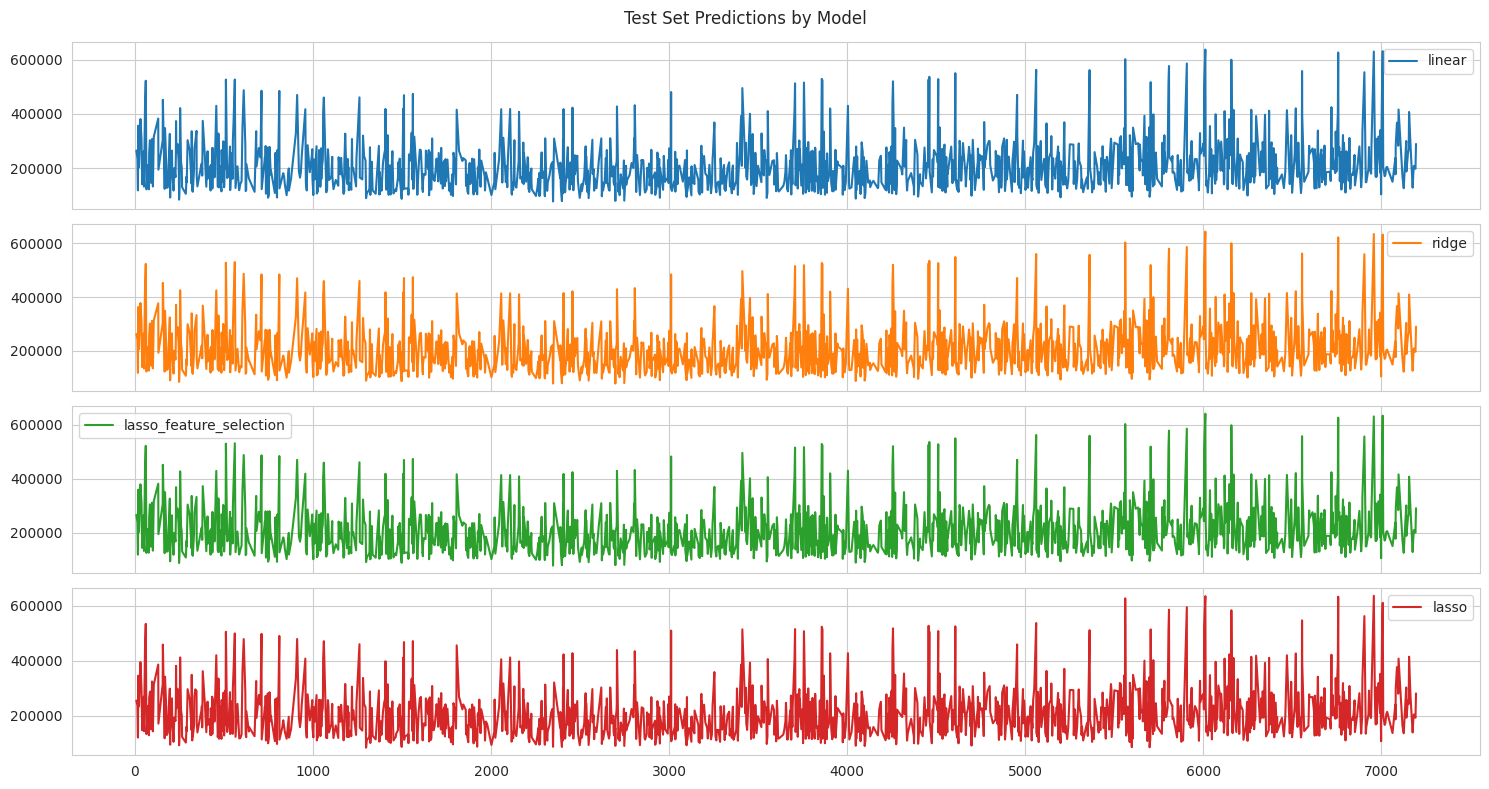


RMSE Summary Table:
                          Train RMSE    Test RMSE Generalization Gap
linear                   3123.223539  5700.441562        2577.218024
lasso_feature_selection  3198.823809   5816.76535        2617.941541
ridge                    3305.571726  5952.091975        2646.520249
lasso                    7937.019811  9817.433225        1880.413414


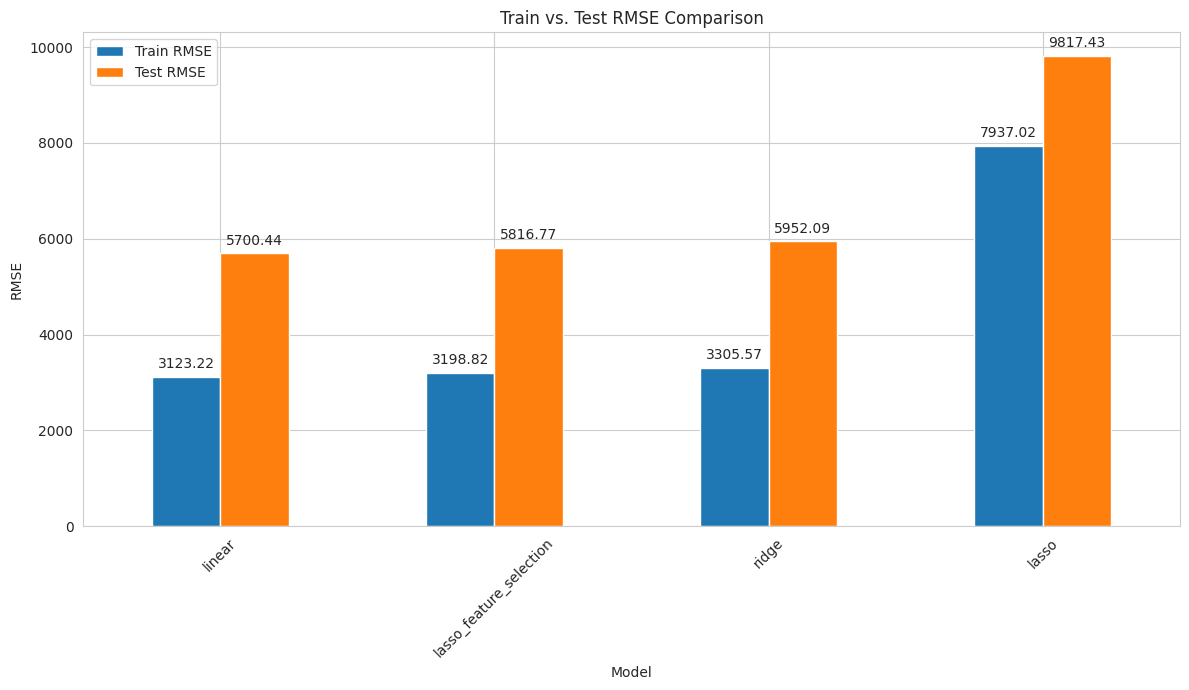


Best Hyperparameters:
linear: {'poly_features__degree': 3}
ridge: {'poly_features__degree': 3, 'ridge__alpha': np.float64(0.001)}
lasso_feature_selection: {'poly_features__degree': 3, 'selector__estimator__alpha': np.float64(1.0)}
lasso: {'lasso__alpha': np.float64(4.414667091806673), 'poly_features__degree': 3}


In [114]:
results = {}
y_train_pred = {}
y_test_pred = {}

### 3) Train, predict, and collect results
for name, model in models.items():
    print(f"Training and evaluating {name}...")

    # Train the model with GridSearchCV
    model.fit(X_train_scaled, y_train)

    # Get the best estimator and make predictions
    best_model = model.best_estimator_
    y_pred_train = best_model.predict(X_train_scaled)
    y_pred_test = best_model.predict(X_test_scaled)

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    # Store results
    results[name] = {
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Best Parameters': model.best_params_, # Store best parameters
        'Result': pd.DataFrame(model.cv_results_).sort_values(by='rank_test_score')
    }

    # Save predictions
    y_train_pred[name] = y_pred_train
    y_test_pred[name] = y_pred_test

    # Extract and store coefficients
    try:
        # Get feature names from the polynomial transformer
        poly_features_step = best_model.named_steps['poly_features']
        all_feature_names = poly_features_step.get_feature_names_out(X_train.columns)

        if name == 'lasso_feature_selection':
            # For feature selection model, get the mask of selected features
            selector = best_model.named_steps['selector']
            selected_features_mask = selector.get_support()
            feature_names = all_feature_names[selected_features_mask]

            # The coefficients are from the LinearRegression step
            coefs = best_model.named_steps['lasso_feature_selection_model'].coef_
        else:
            # For all other models, use all feature names
            feature_names = all_feature_names
            # Get the name of the final estimator step (e.g., 'linear', 'ridge', 'lasso')
            estimator_name = list(best_model.named_steps.keys())[-1]
            coefs = best_model.named_steps[estimator_name].coef_

        results[name]['Coefficients'] = pd.DataFrame(coefs, index=feature_names, columns=['Coefficient Value'])
    except KeyError:
        # Handle cases where the model might not have a 'coef_' attribute (e.g., if a different type of model was used)
        print(f"Warning: Could not extract coefficients for model '{name}'.")

### 2) Extract and compare coefficients (Linear, Ridge, Lasso)

#  Plot the per-model test predictions
y_test_pred_df = pd.DataFrame(y_test_pred, index=y_test.index)

print("\nPer-Model Test Predictions Plots:")
y_test_pred_df.sort_index().plot(kind='line', figsize=(15,8), subplots=True, title='Test Set Predictions by Model')
plt.tight_layout()
plt.show()

# Summarize and visualize RMSEs
rmse_df = pd.DataFrame(results).T[['Train RMSE', 'Test RMSE']]
rmse_df['Generalization Gap'] = rmse_df['Test RMSE'] - rmse_df['Train RMSE']

print("\nRMSE Summary Table:")
print(rmse_df.sort_values(by='Test RMSE'))

# Plot the RMSEs
ax = rmse_df[['Train RMSE', 'Test RMSE']].sort_values(by='Test RMSE').plot(kind='bar', figsize=(12, 7))
plt.title('Train vs. Test RMSE Comparison')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate bars with their values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')
plt.show()

# Print best hyperparameters
print("\nBest Hyperparameters:")
for name, result in results.items():
    print(f"{name}: {result['Best Parameters']}")

In [115]:
pd.DataFrame(results).T[['Train RMSE', 'Test RMSE']]

Train RMSE    Test RMSE
linear                   3123.223539  5700.441562
ridge                    3305.571726  5952.091975
lasso_feature_selection  3198.823809   5816.76535
lasso                    7937.019811  9817.433225

In [116]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


# Other Regression techniques

In [117]:
# Decision Tree Regressor
decision_tree_param_dict = {
    'decisiontree__max_depth': [None, 10, 20, 30],
    'decisiontree__min_samples_split': [2, 5, 10],
    'decisiontree__min_samples_leaf': [1, 2, 4]
}

decision_tree_pipe = Pipeline([
    ('decisiontree', DecisionTreeRegressor())
])

decision_tree_grid = GridSearchCV(
    decision_tree_pipe,
    param_grid=decision_tree_param_dict,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1
)
# Support Vector Regression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

svm_pipe = Pipeline([
    ('poly_features', PolynomialFeatures(include_bias=False)),
    ('svm', SVR())
])

# Update the parameter grid to match the new pipeline steps
svm_param_dict = {
    'poly_features__degree': [1, 2], # Test with and without polynomial features
    'svm__C': [0.1, 1, 10],
    'svm__gamma': ['scale', 'auto'],
    'svm__kernel': ['rbf', 'linear']
}

svm_grid = GridSearchCV(svm_pipe, param_grid=svm_param_dict, cv=5, scoring='neg_mean_squared_error', verbose=1)



# Model Training

In [118]:
_# Dictionaries to store results
cf_results = {}
cf_y_train_pred = {}
cf_y_test_pred = {}
# Model registry
classification_models = {
    'decisiontree': decision_tree_grid,
    'svm': svm_grid,
}


### 3) Train, predict, and collect results
for name, model in classification_models.items():
    print(f"Training and evaluating {name}...")

    # Train the model with GridSearchCV
    model.fit(X_train_scaled, y_train)

    # Get the best estimator and make predictions
    best_model = model.best_estimator_
    y_pred_train = best_model.predict(X_train_scaled)
    y_pred_test = best_model.predict(X_test_scaled)

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    # Store results
    cf_results[name] = {
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Best Parameters': model.best_params_, # Store best parameters
        'Result': pd.DataFrame(model.cv_results_).sort_values(by='rank_test_score')
    }

    # Save predictions
    cf_y_train_pred[name] = y_pred_train
    cf_y_test_pred[name] = y_pred_test

Training and evaluating decisiontree...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Training and evaluating svm...
Fitting 5 folds for each of 24 candidates, totalling 120 fits



Per-Model Test Predictions Plots:


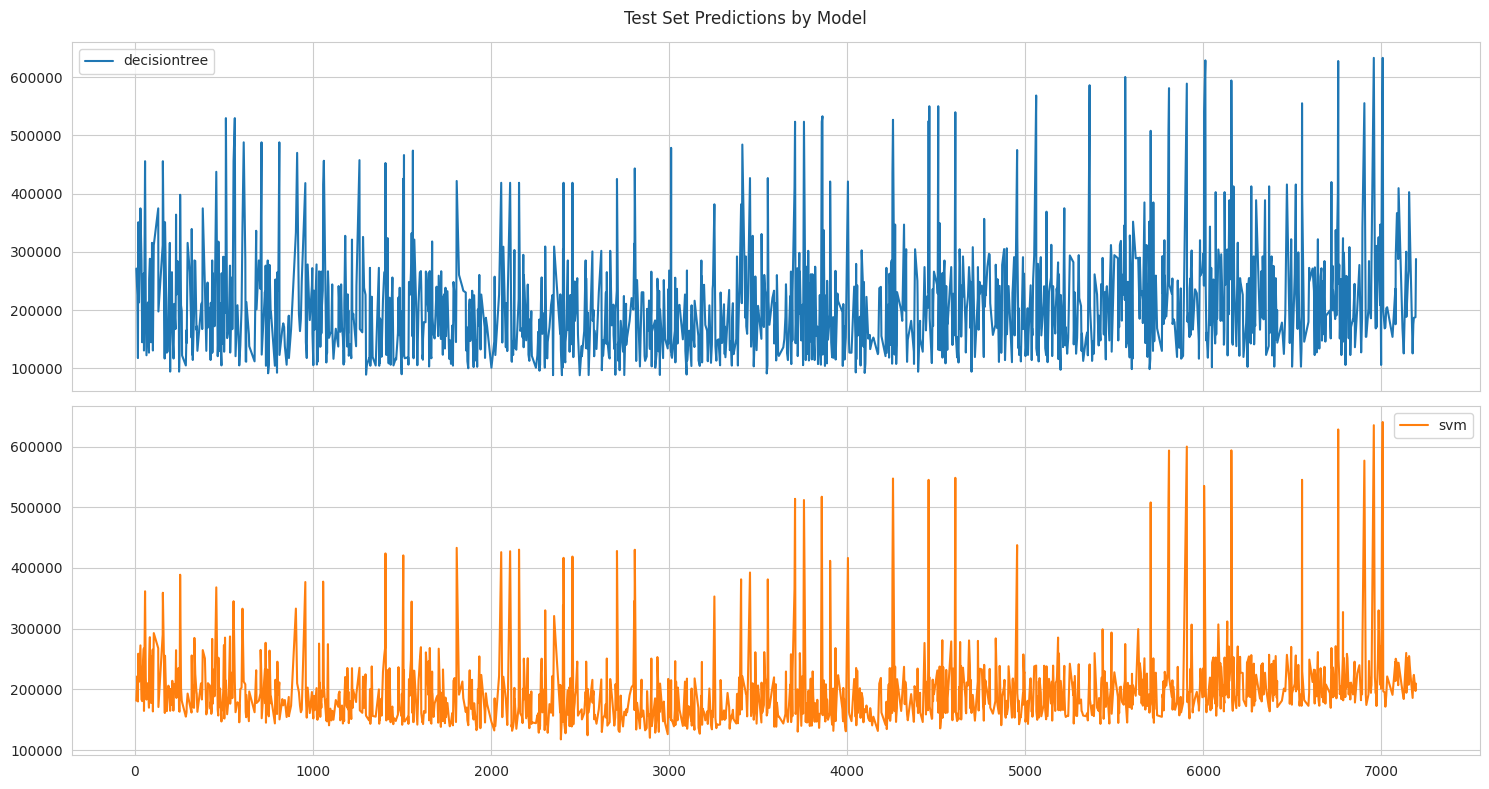


RMSE Summary Table:
                Train RMSE     Test RMSE Generalization Gap
decisiontree    3655.50974  10143.663231        6488.153491
svm           64430.827703  57723.750368       -6707.077336


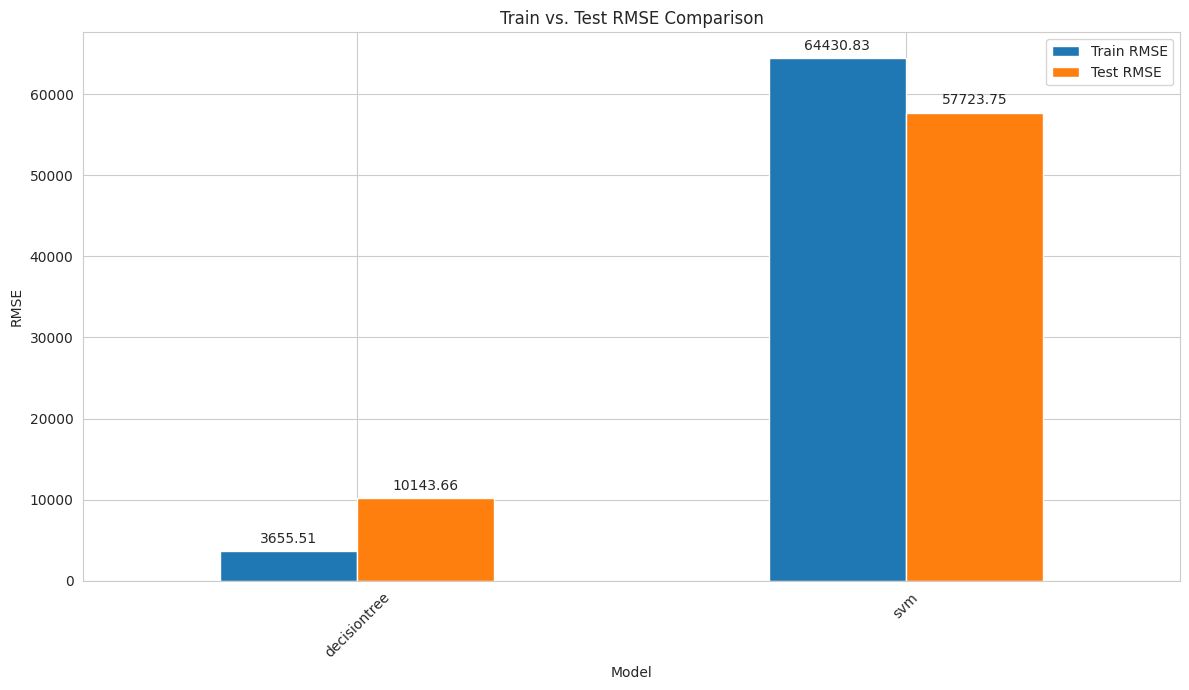


Best Hyperparameters:
decisiontree: {'decisiontree__max_depth': None, 'decisiontree__min_samples_leaf': 2, 'decisiontree__min_samples_split': 2}
svm: {'poly_features__degree': 2, 'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}


In [119]:
### 2) Extract and compare coefficients

#  Plot the per-model test predictions
cf_y_test_pred_df = pd.DataFrame(cf_y_test_pred, index=y_test.index)

print("\nPer-Model Test Predictions Plots:")
cf_y_test_pred_df.sort_index().plot(kind='line', figsize=(15,8), subplots=True, title='Test Set Predictions by Model')
plt.tight_layout()
plt.show()

# Summarize and visualize RMSEs
cf_rmse_df = pd.DataFrame(cf_results).T[['Train RMSE', 'Test RMSE']]
cf_rmse_df['Generalization Gap'] = cf_rmse_df['Test RMSE'] - cf_rmse_df['Train RMSE']

print("\nRMSE Summary Table:")
print(cf_rmse_df.sort_values(by='Test RMSE'))

# Plot the RMSEs
ax = cf_rmse_df[['Train RMSE', 'Test RMSE']].sort_values(by='Test RMSE').plot(kind='bar', figsize=(12, 7))
plt.title('Train vs. Test RMSE Comparison')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate bars with their values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')
plt.show()

# Print best hyperparameters
print("\nBest Hyperparameters:")
for name, result in cf_results.items():
    print(f"{name}: {result['Best Parameters']}")

In [120]:
# Create a summary DataFrame for feature importances and coefficients
feature_comparison = pd.DataFrame()

# Extract and add Decision Tree feature importances
if 'Feature Importances' in cf_results['decisiontree']:
    feature_comparison['Decision Tree Importance'] = results['decisiontree']['Feature Importances']['Importance']

# Extract and add SVM coefficients (only if linear kernel was chosen)
if 'Coefficients' in cf_results['svm']:
    feature_comparison['SVM Coefficients'] = cf_results['svm']['Coefficients']['Coefficient Value']



# **Train vs. Test RMSE Comparison for all models**




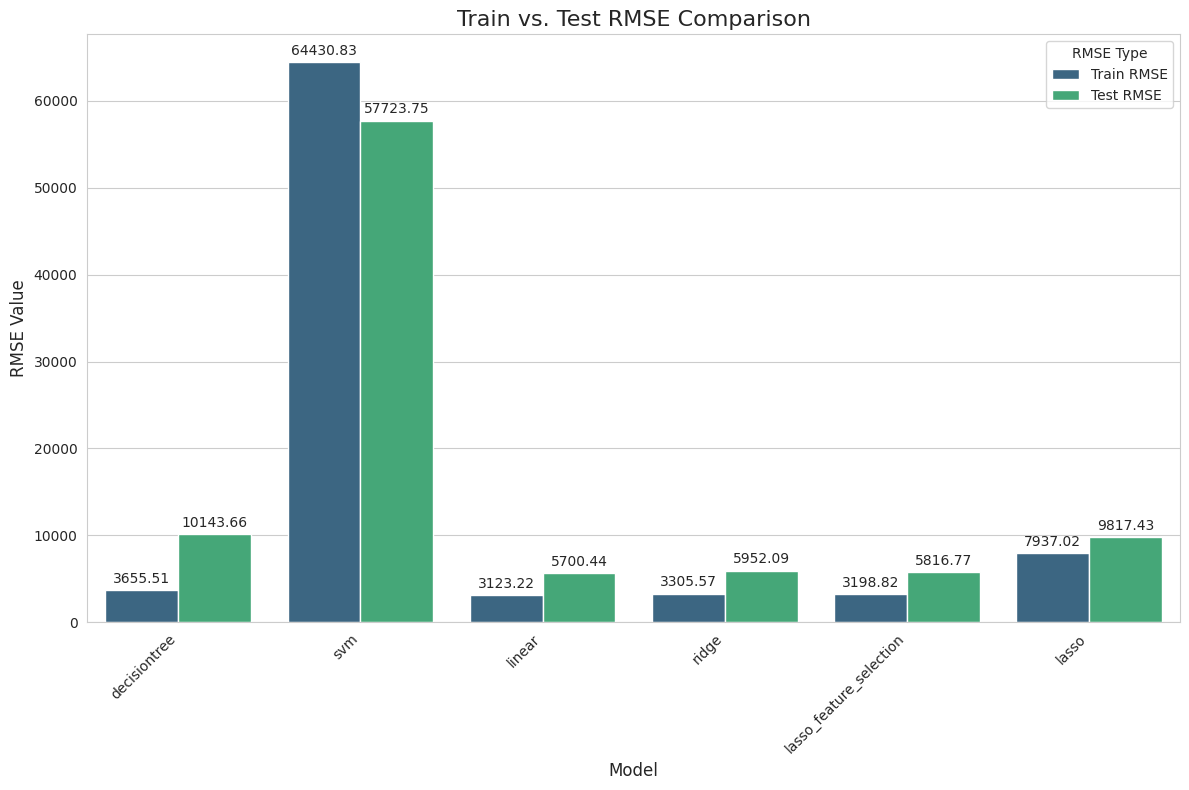

In [121]:

try:
    # Add a 'Model' column to each DataFrame before concatenating.
    # Replace 'Model' with the actual column name that identifies the model, if different.
    # If the model names are not in a column, you'll need to create one.
    # This example assumes the dataframes have an index that can be used as a model name.
    # If not, you may need to manually add a 'Model' column to each.
    if 'Model' not in cf_rmse_df.columns:
        cf_rmse_df['Model'] = cf_rmse_df.index
    if 'Model' not in rmse_df.columns:
        rmse_df['Model'] = rmse_df.index

    # Combine the DataFrames
    comparison_df = pd.concat([cf_rmse_df, rmse_df], ignore_index=True)

    # Set a clean style for the plot
    sns.set_style("whitegrid")

    # Melt the DataFrame to a long format for easier plotting with seaborn
    melted_df = comparison_df.melt(id_vars='Model', value_vars=['Train RMSE', 'Test RMSE'],
                                   var_name='RMSE Type', value_name='RMSE Value')

    # Create the grouped bar chart
    plt.figure(figsize=(12, 8))
    barplot = sns.barplot(x='Model', y='RMSE Value', hue='RMSE Type', data=melted_df, palette='viridis')

    # Add labels and a title
    plt.xlabel("Model", fontsize=12)
    plt.ylabel("RMSE Value", fontsize=12)
    plt.title("Train vs. Test RMSE Comparison", fontsize=16)

    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45, ha="right")

    # Add the RMSE values on top of the bars for clarity
    for container in barplot.containers:
        barplot.bar_label(container, fmt='%.2f', label_type='edge', padding=3, fontsize=10)

    # Adjust plot layout
    plt.tight_layout()

    # Display the plot
    plt.show()

except NameError:
    print("Error: `cf_rmse_df` or `rmse_df` not found.")
    print("Please make sure these DataFrames are defined in your notebook before running this cell.")

